<a id="Header"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#0D4C92;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          LOAN PREDICTION
</p>
</div>

<p style="text-align:center">
    <img src="https://img.etimg.com/thumb/width-1200,height-900,imgsize-18534,resizemode-1,msid-93105346/wealth/borrow/10-best-no-credit-check-loans-and-bad-credit-loans-with-guaranteed-approval.jpg" width="300" alt="Water"  />
    </a>
</p>

<a id="Table"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          Table of Contents
</p>
</div>


* [1. Introduction](#1)
    * [1.1 Import Libraries](#1.1)
    * [1.2 Load the Dataset](#1.2)
    * [1.3 An Overview of the Dataset](#1.3)
    
    
* [2. EDA & Data Preprocessing](#2)
    * [2.1 Descriptive Statistics](#2.1)
    * [2.2 Identify and handle missing values](#2.2)
    * [2.3 Correct data format](#2.3)
    * [2.4 Explore categorical data](#2.4)
    * [2.5 Explore numerical data](#2.5)
    * [2.6 Normalize data](#2.6)
    * [2.7 Handle outliers](#2.7)
    * [2.8 Cluster analysis](#2.8)
    
    
* [3. Prediction Model](#3)
    * [3.1 Prepare the data for model building](#3.1)
    * [3.2 Build the models](#3.2)
    * [3.3 Evaluate the models](#3.3)
    * [3.4 Model improvement](#3.4)
    * [3.5 Confusion Matrix](#3.5)


* [4. Conclusion & Recommendation](#4)
    * [4.1 Model selection & Conclusion](#4.1)
    * [4.2 Loan Prediction Model Deployment](#4.2)
 
 
* [5. References](#5)

<a id="1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          1.Introduction
</p>
</div>

[Return Table of Contents](#Table)

### About The Dataset
#### Context
> Company X deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form.

#### Content
> This dataset contains the loan history of the company's previous customers. The detail of each column of the dataset is as follows:

|No.|Column Name|Description|
|---|---|---|
|1|Loan_ID|Unique Loan ID|
|2|Gender|Male/ Female|
|4|Dependents|Number of dependents|
|5|Education|Applicant Education (Graduate/ Undergraduate)|
|6|Self_Employed|Self-employed (Y/N)|
|7|ApplicantIncome|Applicant income|
|8|CoapplicantIncome|Coapplicant income|
|9|LoanAmount|Loan amount in thousands|
|10|Loan_Amount_Term|Term of a loan in months|
|11|Credit_History|credit history meets guidelines|
|12|Property_Area|Urban / Semi-Urban / Rural|
|13|Loan_Status|Loan approved (Y/N)|

#### Main Task
The main purpose of this project is to explore the dataset and create a simple model to predict the loan status for new customers


<a id="1.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          1.1 Import Libraries 
</p>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<a id="1.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          1.2 Load The dataset 
</p>
</div>

In [2]:
df = pd.read_csv('company-x-loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a id="1.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          1.3 An Overview Of The Dataset
</p>
</div>

In [3]:
df.shape

(614, 13)

> The dataset contains 614 rows and 13 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


> This dataset contains missing values and some columns have incorrect data type

<a id="2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          2. EDA & Data Preprocessing
</p>
</div>

[Return Table of Contents](#Table)

<a id="2.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.1. Descriptive Statistics
</p>
</div>

### Categorical Data

In [5]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001891,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Numerical Data

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Check duplicates

In [7]:
df.duplicated().any()

False

> There is no duplicated rows in the dataset

<a id="2.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.2. Identify and handle missing values
</p>
</div>

<h3 id="identify_missing_values">Identify missing values</h3>

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

> Based on the summary above, each column has 614 rows of data, 7 columns containing missing data:

><ol>
    ><li>"Gender": 13 missing data</li>
    ><li>"Married": 3 missing data</li>
    ><li>"Dependents": 15 missing data</li>
    ><li>"Self_Employed" : 32 missing data</li>
    ><li>"LoanAmount": 22 missing data</li>
    ><li>"Loan_Amount_Term": 14 missing data</li>
    <li>"Credit_History": 50 missing data</li>
></ol>

<h3 id="handle_missing_values">Handle missing values</h3>
<span style="color:blue"> STEP 1: Drop rows with more than 1 missing values</span> 

In [9]:
df.dropna(how='any',thresh=12,inplace=True)

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               0
Dependents           10
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

<span style="color:blue"> STEP 2: Replace numerical data by mean</span> 

In [11]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               0
Dependents           10
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

<span style="color:blue"> STEP 3: Replace categorical data by mode</span> 

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

> All missing data has been dropped or replaced

<a id="2.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.3. Correct data format
</p>
</div>

In [15]:
# The ApplicantIncome column should be converted into float type to match the CoapplicantIncome column
df["ApplicantIncome"] = df["ApplicantIncome"].astype('float64')

# Term of a loan is counted by months so the Loan_Amount_Term should be converted into int type
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype('int64')

# We will change the type of Credit_History to object becauce this variable only contains 2 values: 1 or 0
df['Credit_History'] = df['Credit_History'].astype('object') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            601 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            601 non-null    object 
 3   Dependents         601 non-null    object 
 4   Education          601 non-null    object 
 5   Self_Employed      601 non-null    object 
 6   ApplicantIncome    601 non-null    float64
 7   CoapplicantIncome  601 non-null    float64
 8   LoanAmount         601 non-null    float64
 9   Loan_Amount_Term   601 non-null    int64  
 10  Credit_History     601 non-null    object 
 11  Property_Area      601 non-null    object 
 12  Loan_Status        601 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 65.7+ KB


<a id="2.4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.4. Explore Categorical Data
</p>
</div>

"Loan status" is a kind of categorical data, therefore, we will use countplot to find the relationship between Loan status and other independent variables. According to common sense, maybe Marrial stage, Education, Self-employed stage and Property_Area are key categorial predictive variable.

In [16]:
Gender = []
Approval_Pct = []

for i in df['Gender'].unique():
    Gender.append(i)
    Approved = len(df[(df['Gender'] == i) & (df['Loan_Status'] == "Y")])/len(df[(df['Gender'] == i)])
    Approval_Pct.append(Approved)

Pct = pd.DataFrame(list(zip(Gender, Approval_Pct)), columns = ['Gender','Approval_Pct'])
Pct

,Gender,Approval_Pct
0,Male,0.692464
1,Female,0.672727


> To see the difference in approval rate between the 2 genders, we calculated the percentage of loan approved by each gender

<AxesSubplot:xlabel='Gender', ylabel='Approval_Pct'>

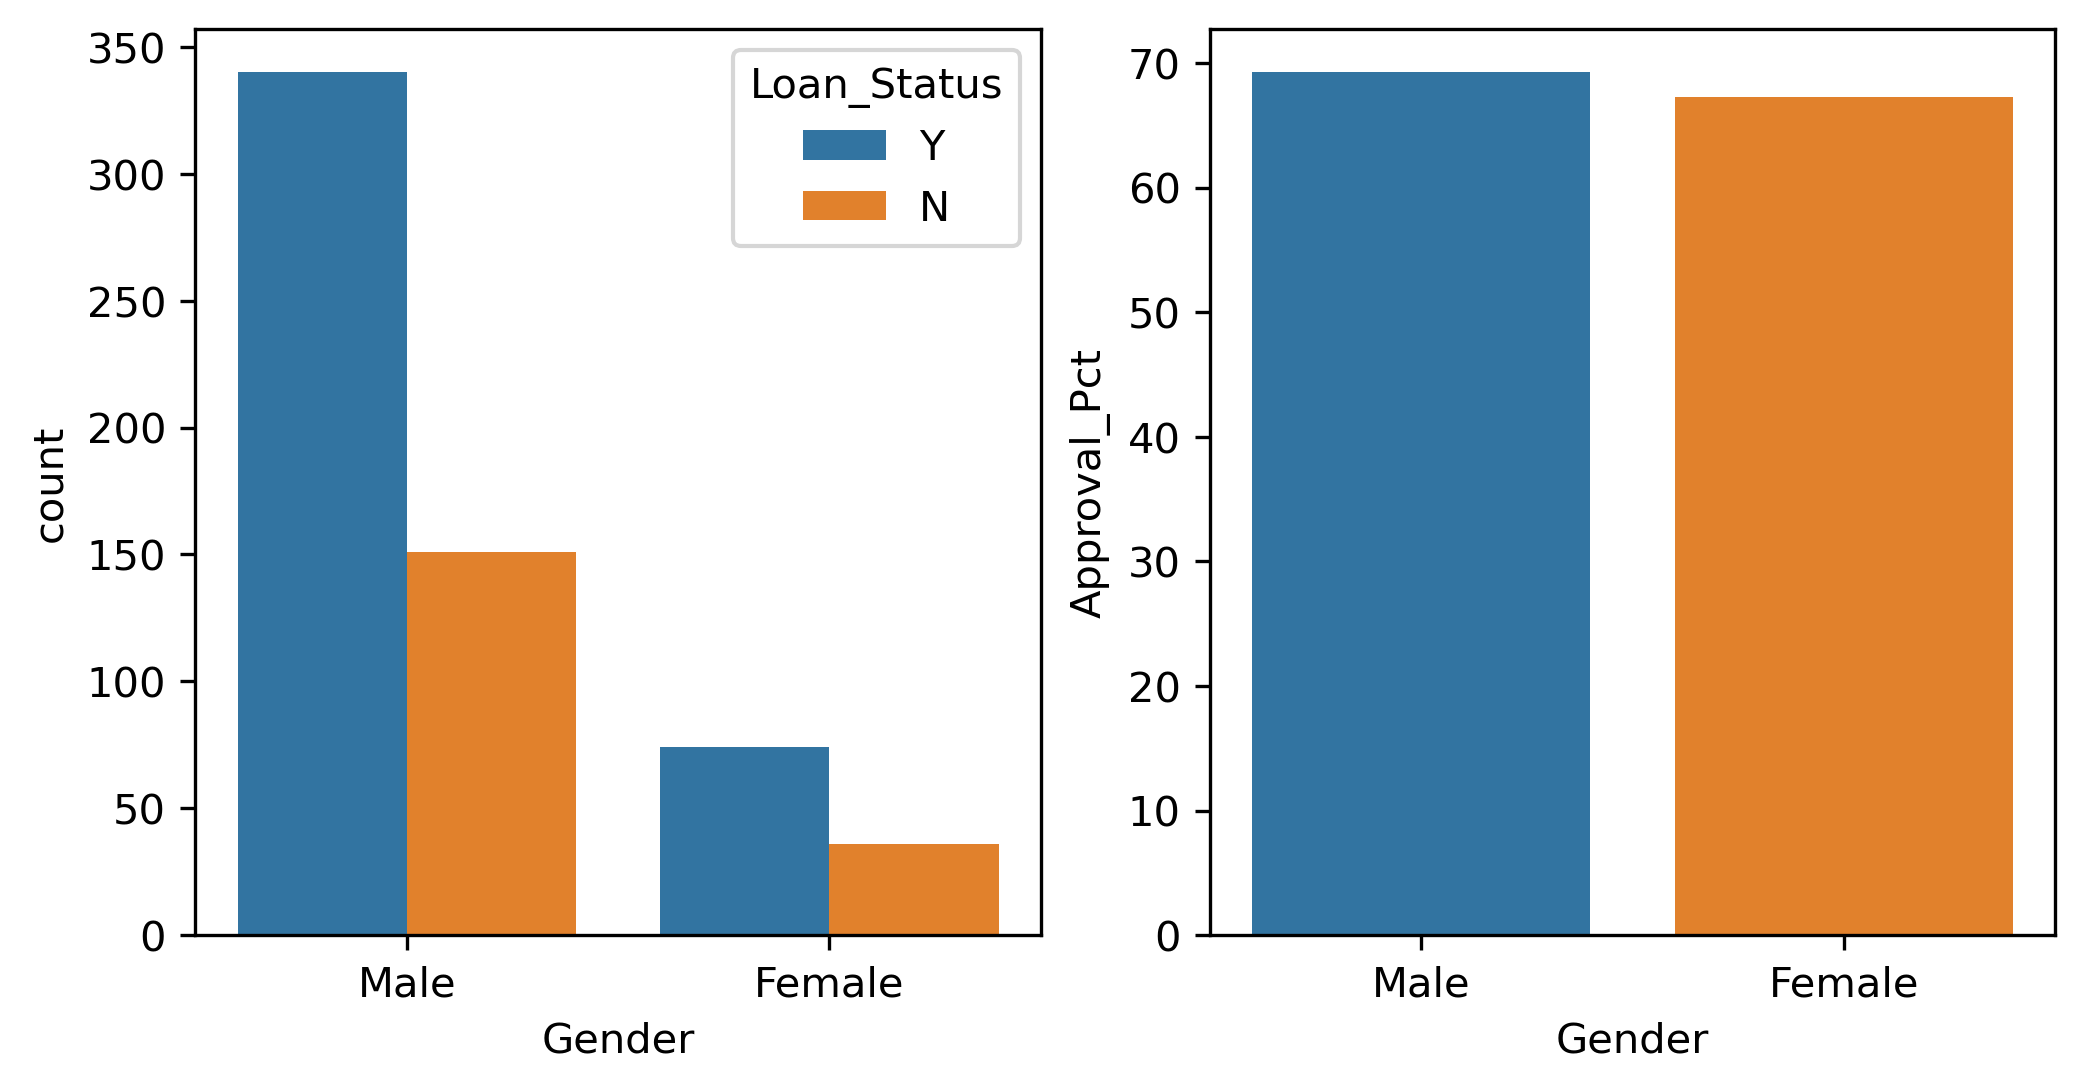

In [17]:
plt.figure(figsize = (8,4),dpi =300)
plt.subplot(1,2,1)
sns.countplot(x='Gender',hue='Loan_Status',data=df)

plt.subplot(1,2,2)
Gender = []
Approval_Pct = []

for i in df['Gender'].unique():
    Gender.append(i)
    Approved = len(df[(df['Gender'] == i) & (df['Loan_Status'] == "Y")])/len(df[(df['Gender'] == i)])*100
    Approval_Pct.append(Approved)

Pct = pd.DataFrame(list(zip(Gender, Approval_Pct)), columns = ['Gender','Approval_Pct'])
sns.barplot(data = Pct,x = 'Gender', y ='Approval_Pct')

> According to this plot, male are more likely than female to apply for loan. However, there is no significant difference in the probability of loan approval between genders.

<AxesSubplot:xlabel='Married', ylabel='Approval_Pct'>

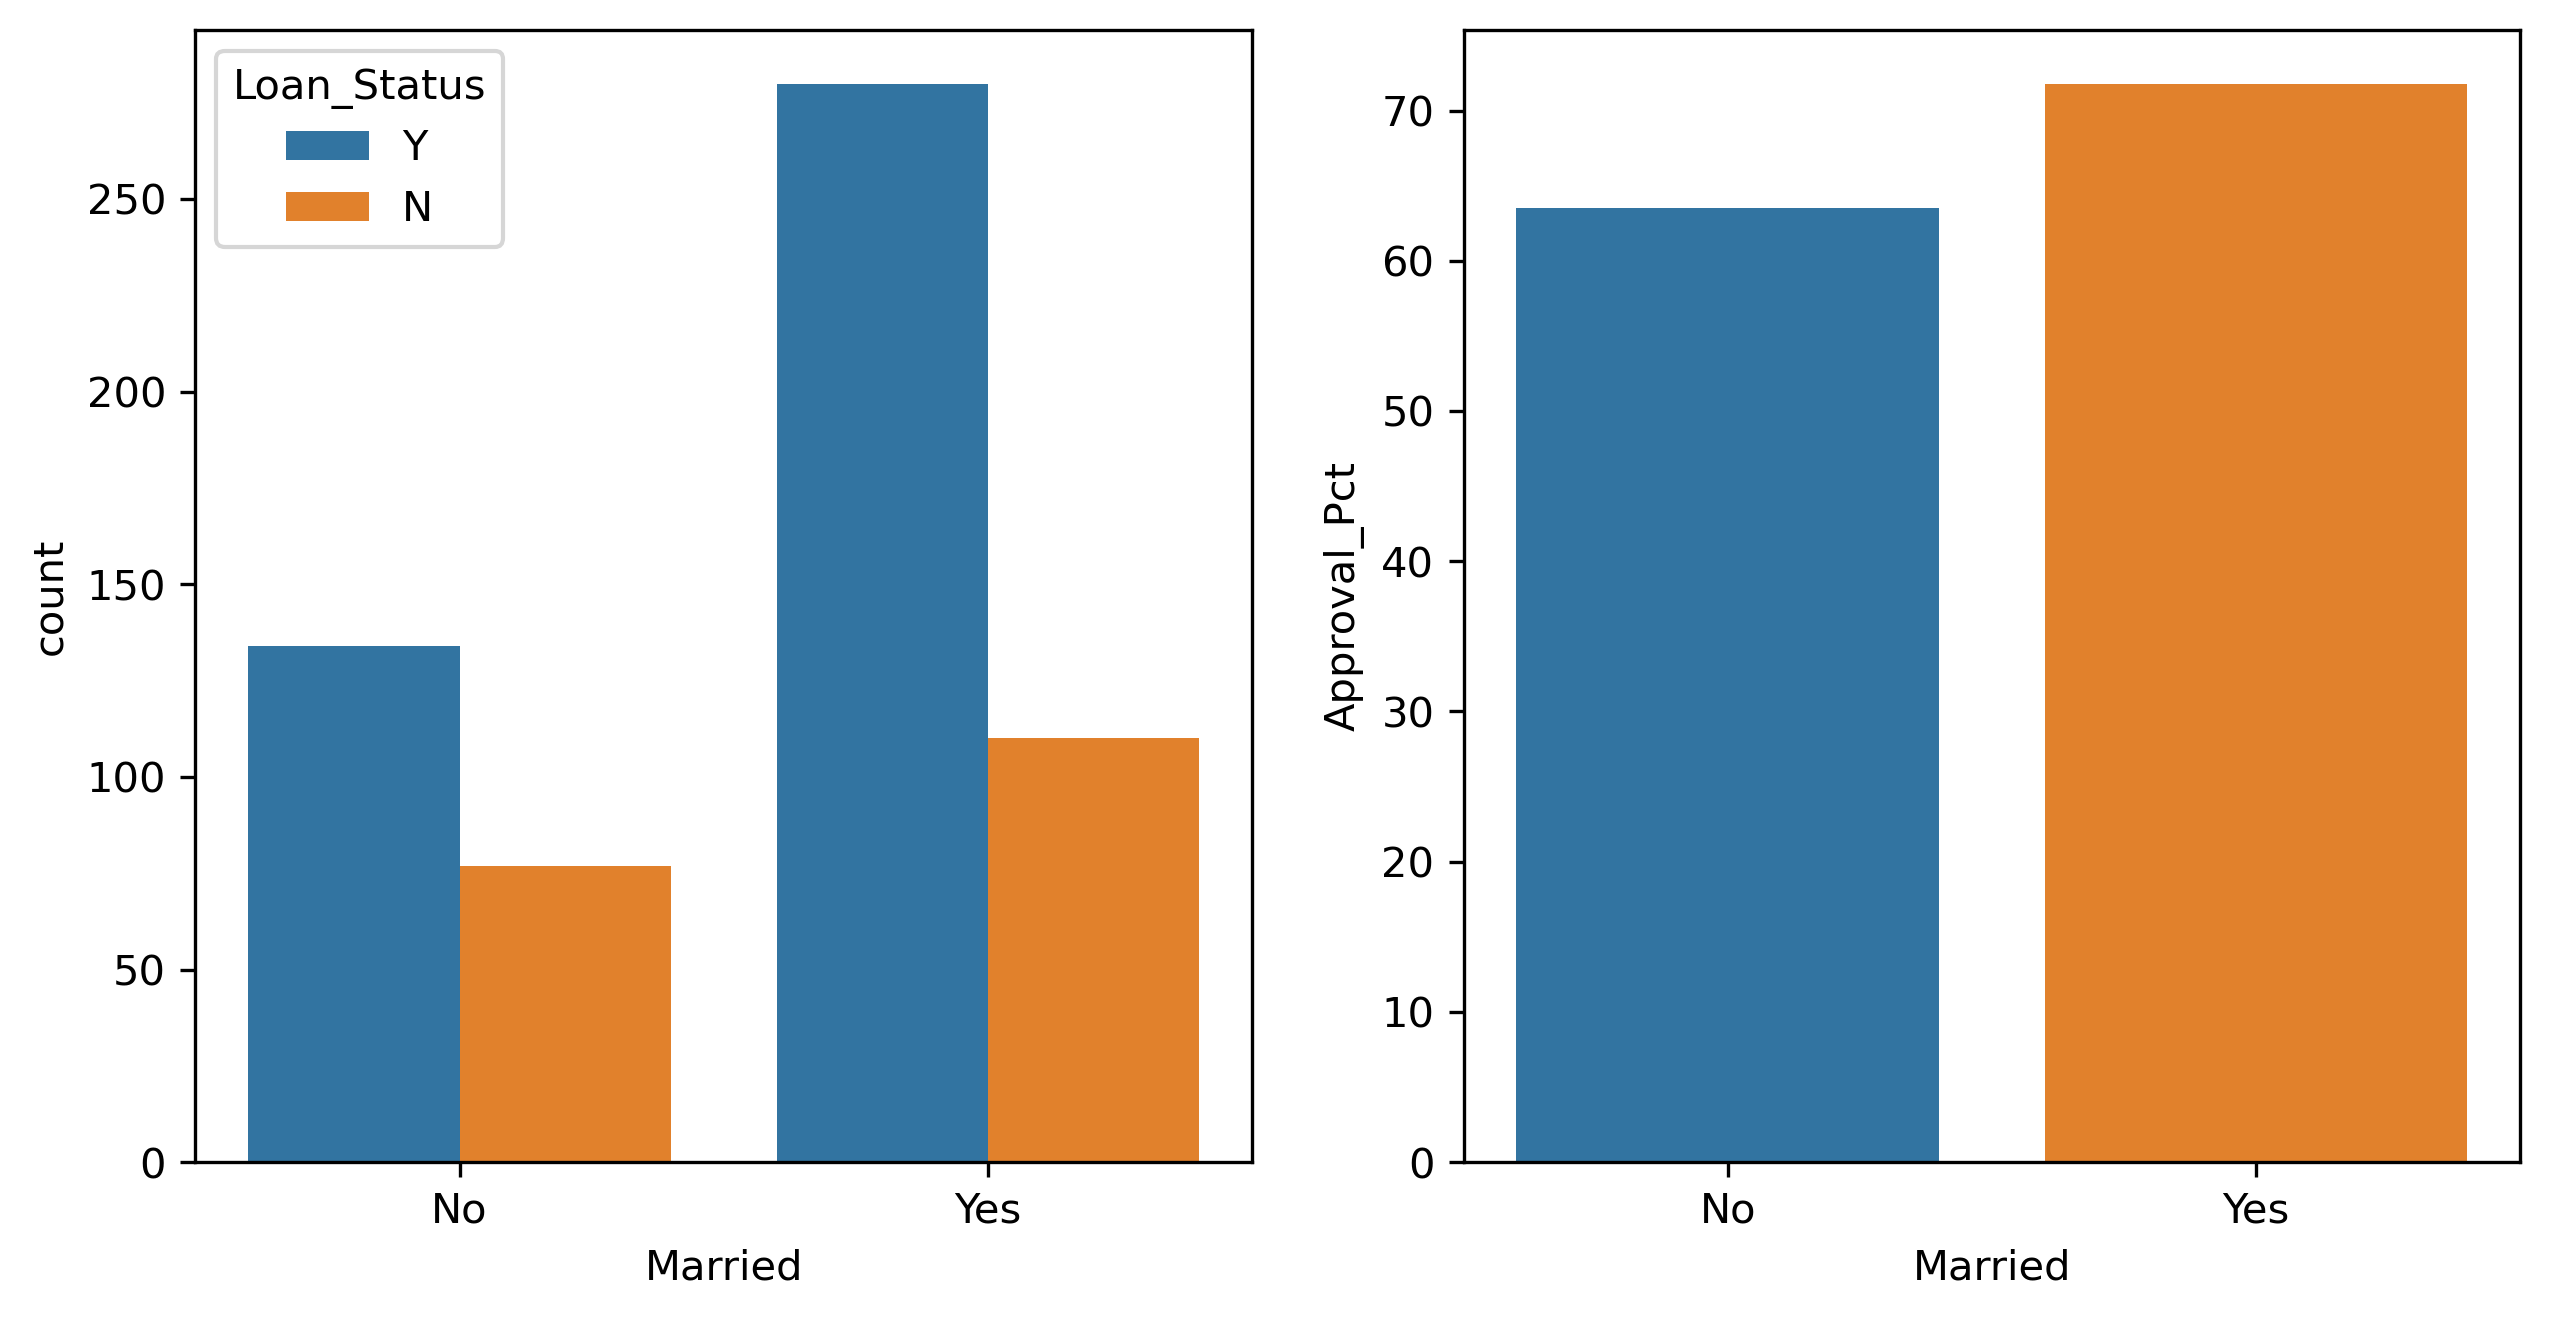

In [18]:
plt.figure(figsize = (10,5),dpi =300)
plt.subplot(1,2,1)
sns.countplot(x='Married',hue='Loan_Status',data=df)

plt.subplot(1,2,2)
Married = []
Approval_Pct = []

for i in df['Married'].unique():
    Married.append(i)
    Approved = len(df[(df['Married'] == i) & (df['Loan_Status'] == "Y")])/len(df[(df['Married'] == i)])*100
    Approval_Pct.append(Approved)

Pct = pd.DataFrame(list(zip(Married, Approval_Pct)), columns = ['Married','Approval_Pct'])
sns.barplot(data = Pct,x = 'Married', y ='Approval_Pct')

> From the plot, we can see that married people are nearly 8% more likely to get the loan, which means marritual status may be a good predictor.

<AxesSubplot:xlabel='Dependents', ylabel='Approval_Pct'>

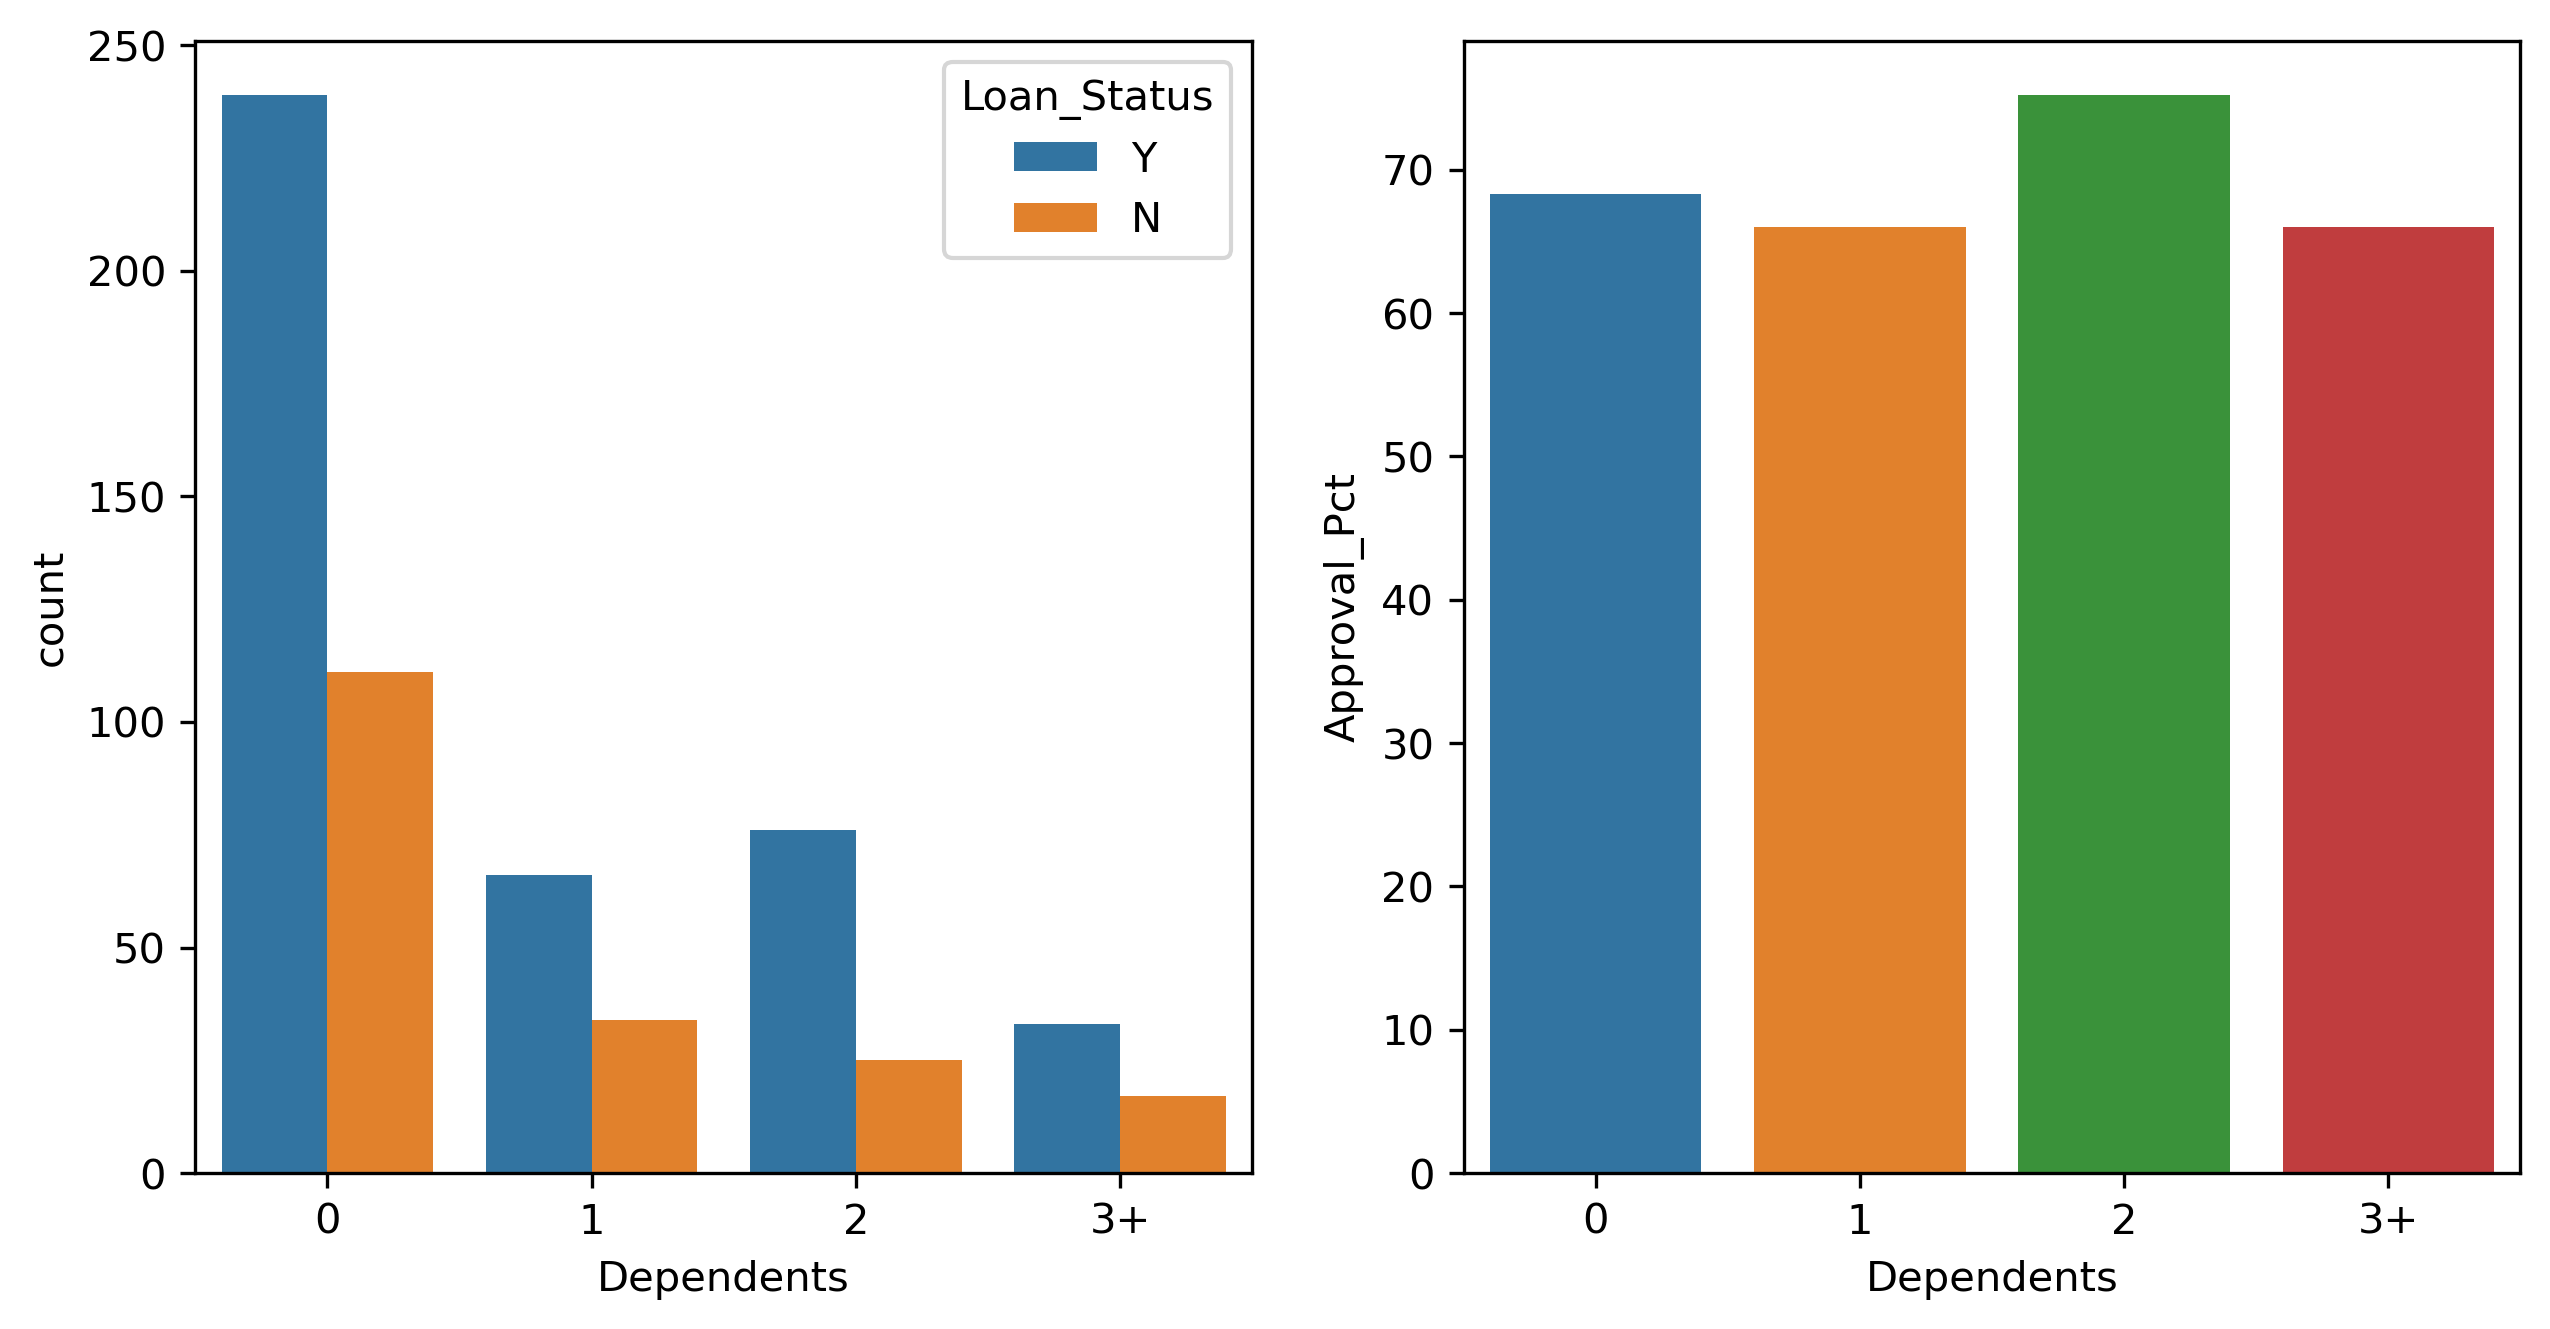

In [19]:
plt.figure(figsize = (10,5),dpi =300)
plt.subplot(1,2,1)
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

plt.subplot(1,2,2)
Dependents = []
Approval_Pct = []

for i in df['Dependents'].unique():
    Dependents.append(i)
    Approved = len(df[(df['Dependents'] == i) & (df['Loan_Status'] == "Y")])/len(df[(df['Dependents'] == i)])*100
    Approval_Pct.append(Approved)

Pct = pd.DataFrame(list(zip(Dependents, Approval_Pct)), columns = ['Dependents','Approval_Pct'])
sns.barplot(data = Pct,x = 'Dependents', y ='Approval_Pct')

<AxesSubplot:xlabel='Education', ylabel='Approval_Pct'>

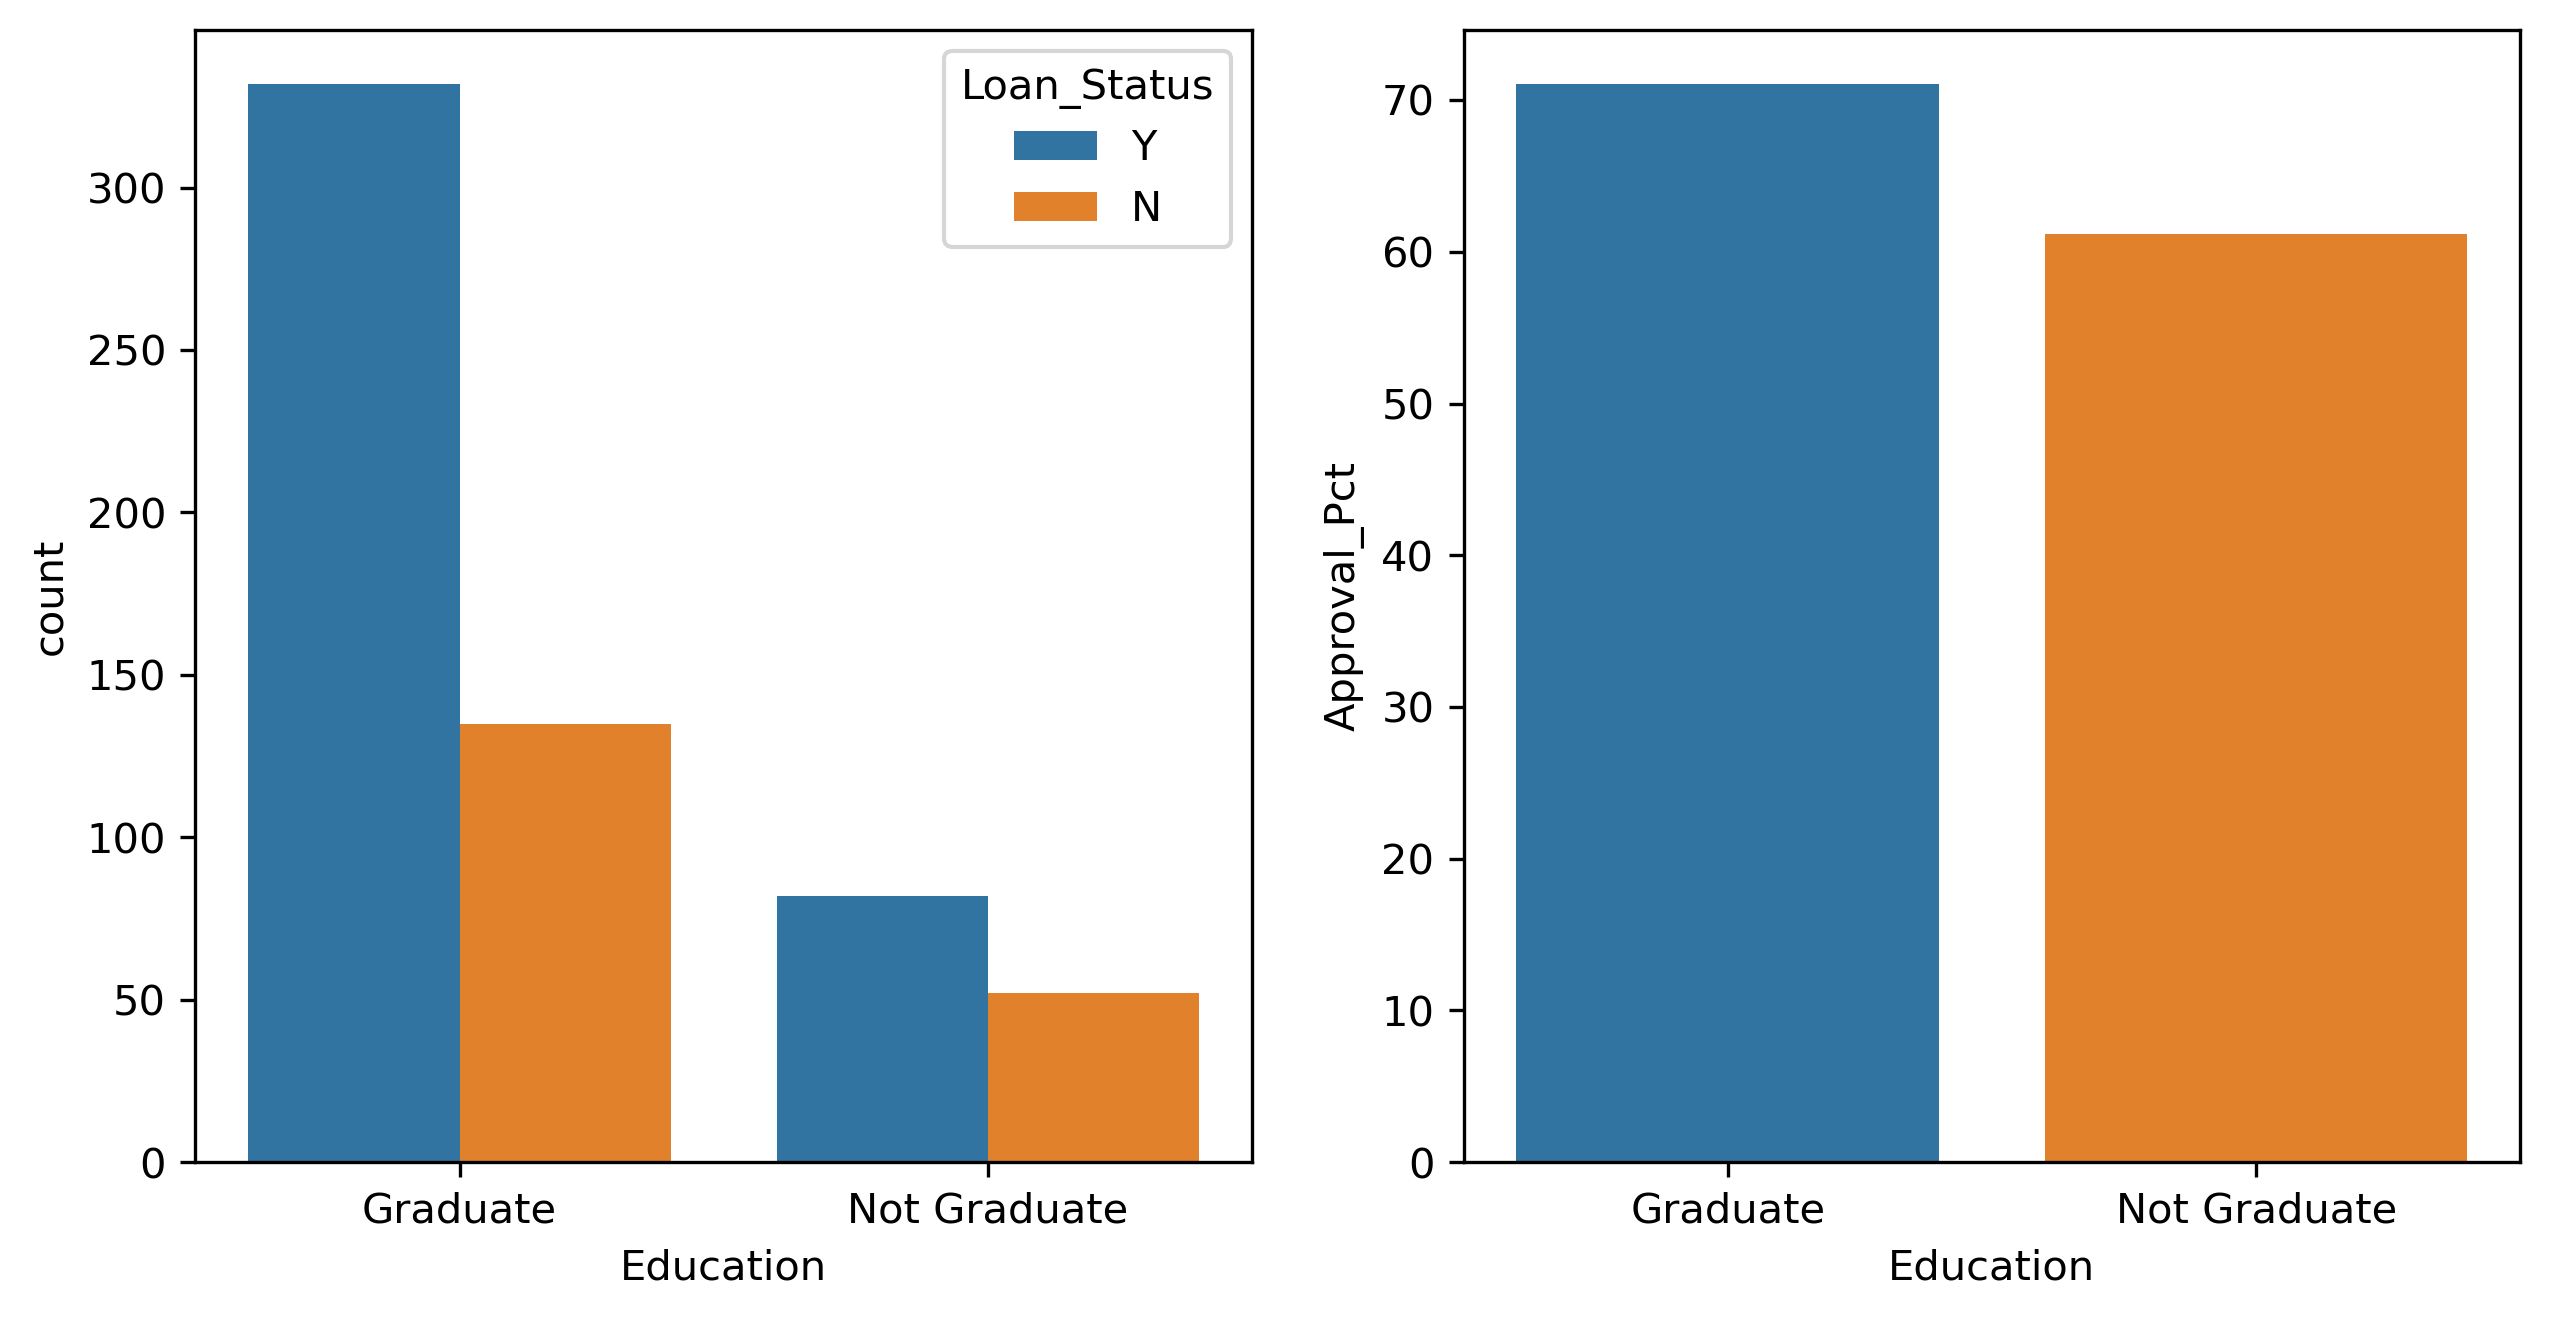

In [20]:
plt.figure(figsize = (10,5),dpi =300)
plt.subplot(1,2,1)
sns.countplot(x='Education',hue='Loan_Status',data=df)

plt.subplot(1,2,2)
Education = []
Approval_Pct = []

for i in df['Education'].unique():
    Education.append(i)
    Approved = len(df[(df['Education'] == i) & (df['Loan_Status'] == "Y")])/len(df[(df['Education'] == i)])*100
    Approval_Pct.append(Approved)

Pct = pd.DataFrame(list(zip(Education, Approval_Pct)), columns = ['Education','Approval_Pct'])
sns.barplot(data = Pct,x = 'Education', y ='Approval_Pct')

> Conforming to our gut, the graduated people are nearly 9% more likely to pass the loan assessment.

<AxesSubplot:xlabel='Self_Employed', ylabel='Approval_Pct'>

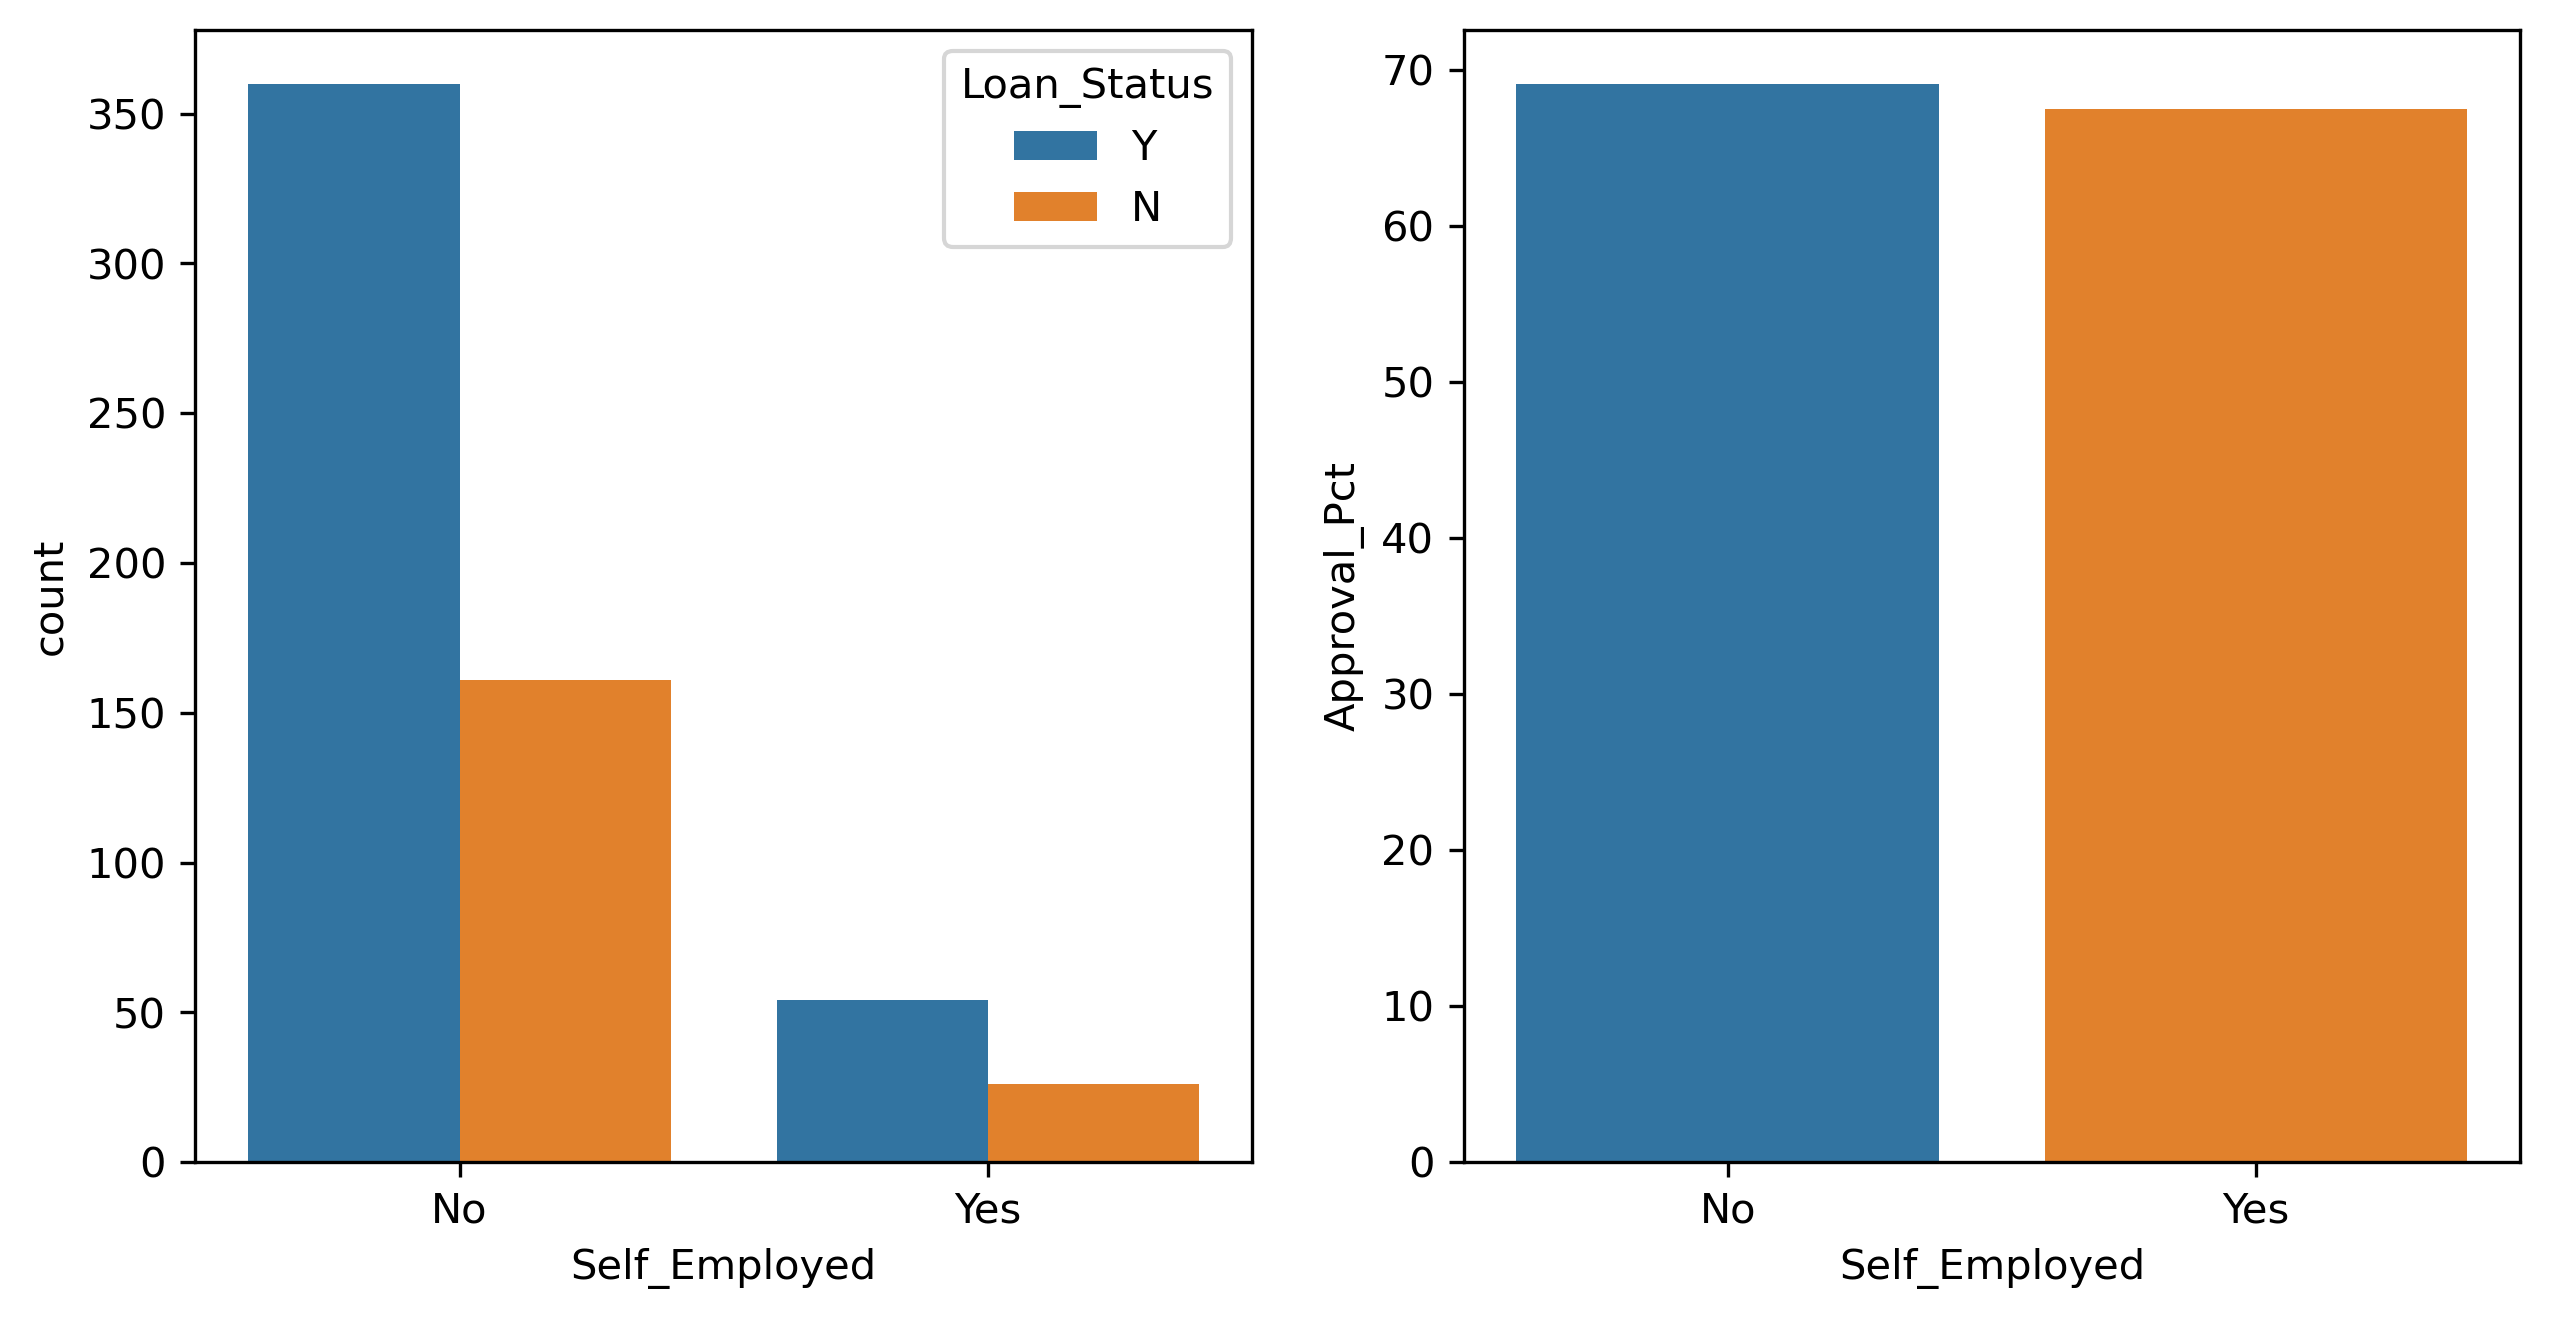

In [21]:
plt.figure(figsize = (10,5),dpi =300)
plt.subplot(1,2,1)
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

plt.subplot(1,2,2)
Self_Employed = []
Approval_Pct = []

for i in df['Self_Employed'].unique():
    Self_Employed.append(i)
    Approved = len(df[(df['Self_Employed'] == i) & (df['Loan_Status'] == "Y")])/len(df[(df['Self_Employed'] == i)])*100
    Approval_Pct.append(Approved)

Pct = pd.DataFrame(list(zip(Self_Employed, Approval_Pct)), columns = ['Self_Employed','Approval_Pct'])
sns.barplot(data = Pct,x = 'Self_Employed', y ='Approval_Pct')

> Clearly, there's nearly no difference whether a man is self employed or not. And it's not a good predictor.

<AxesSubplot:xlabel='Property_Area', ylabel='Approval_Pct'>

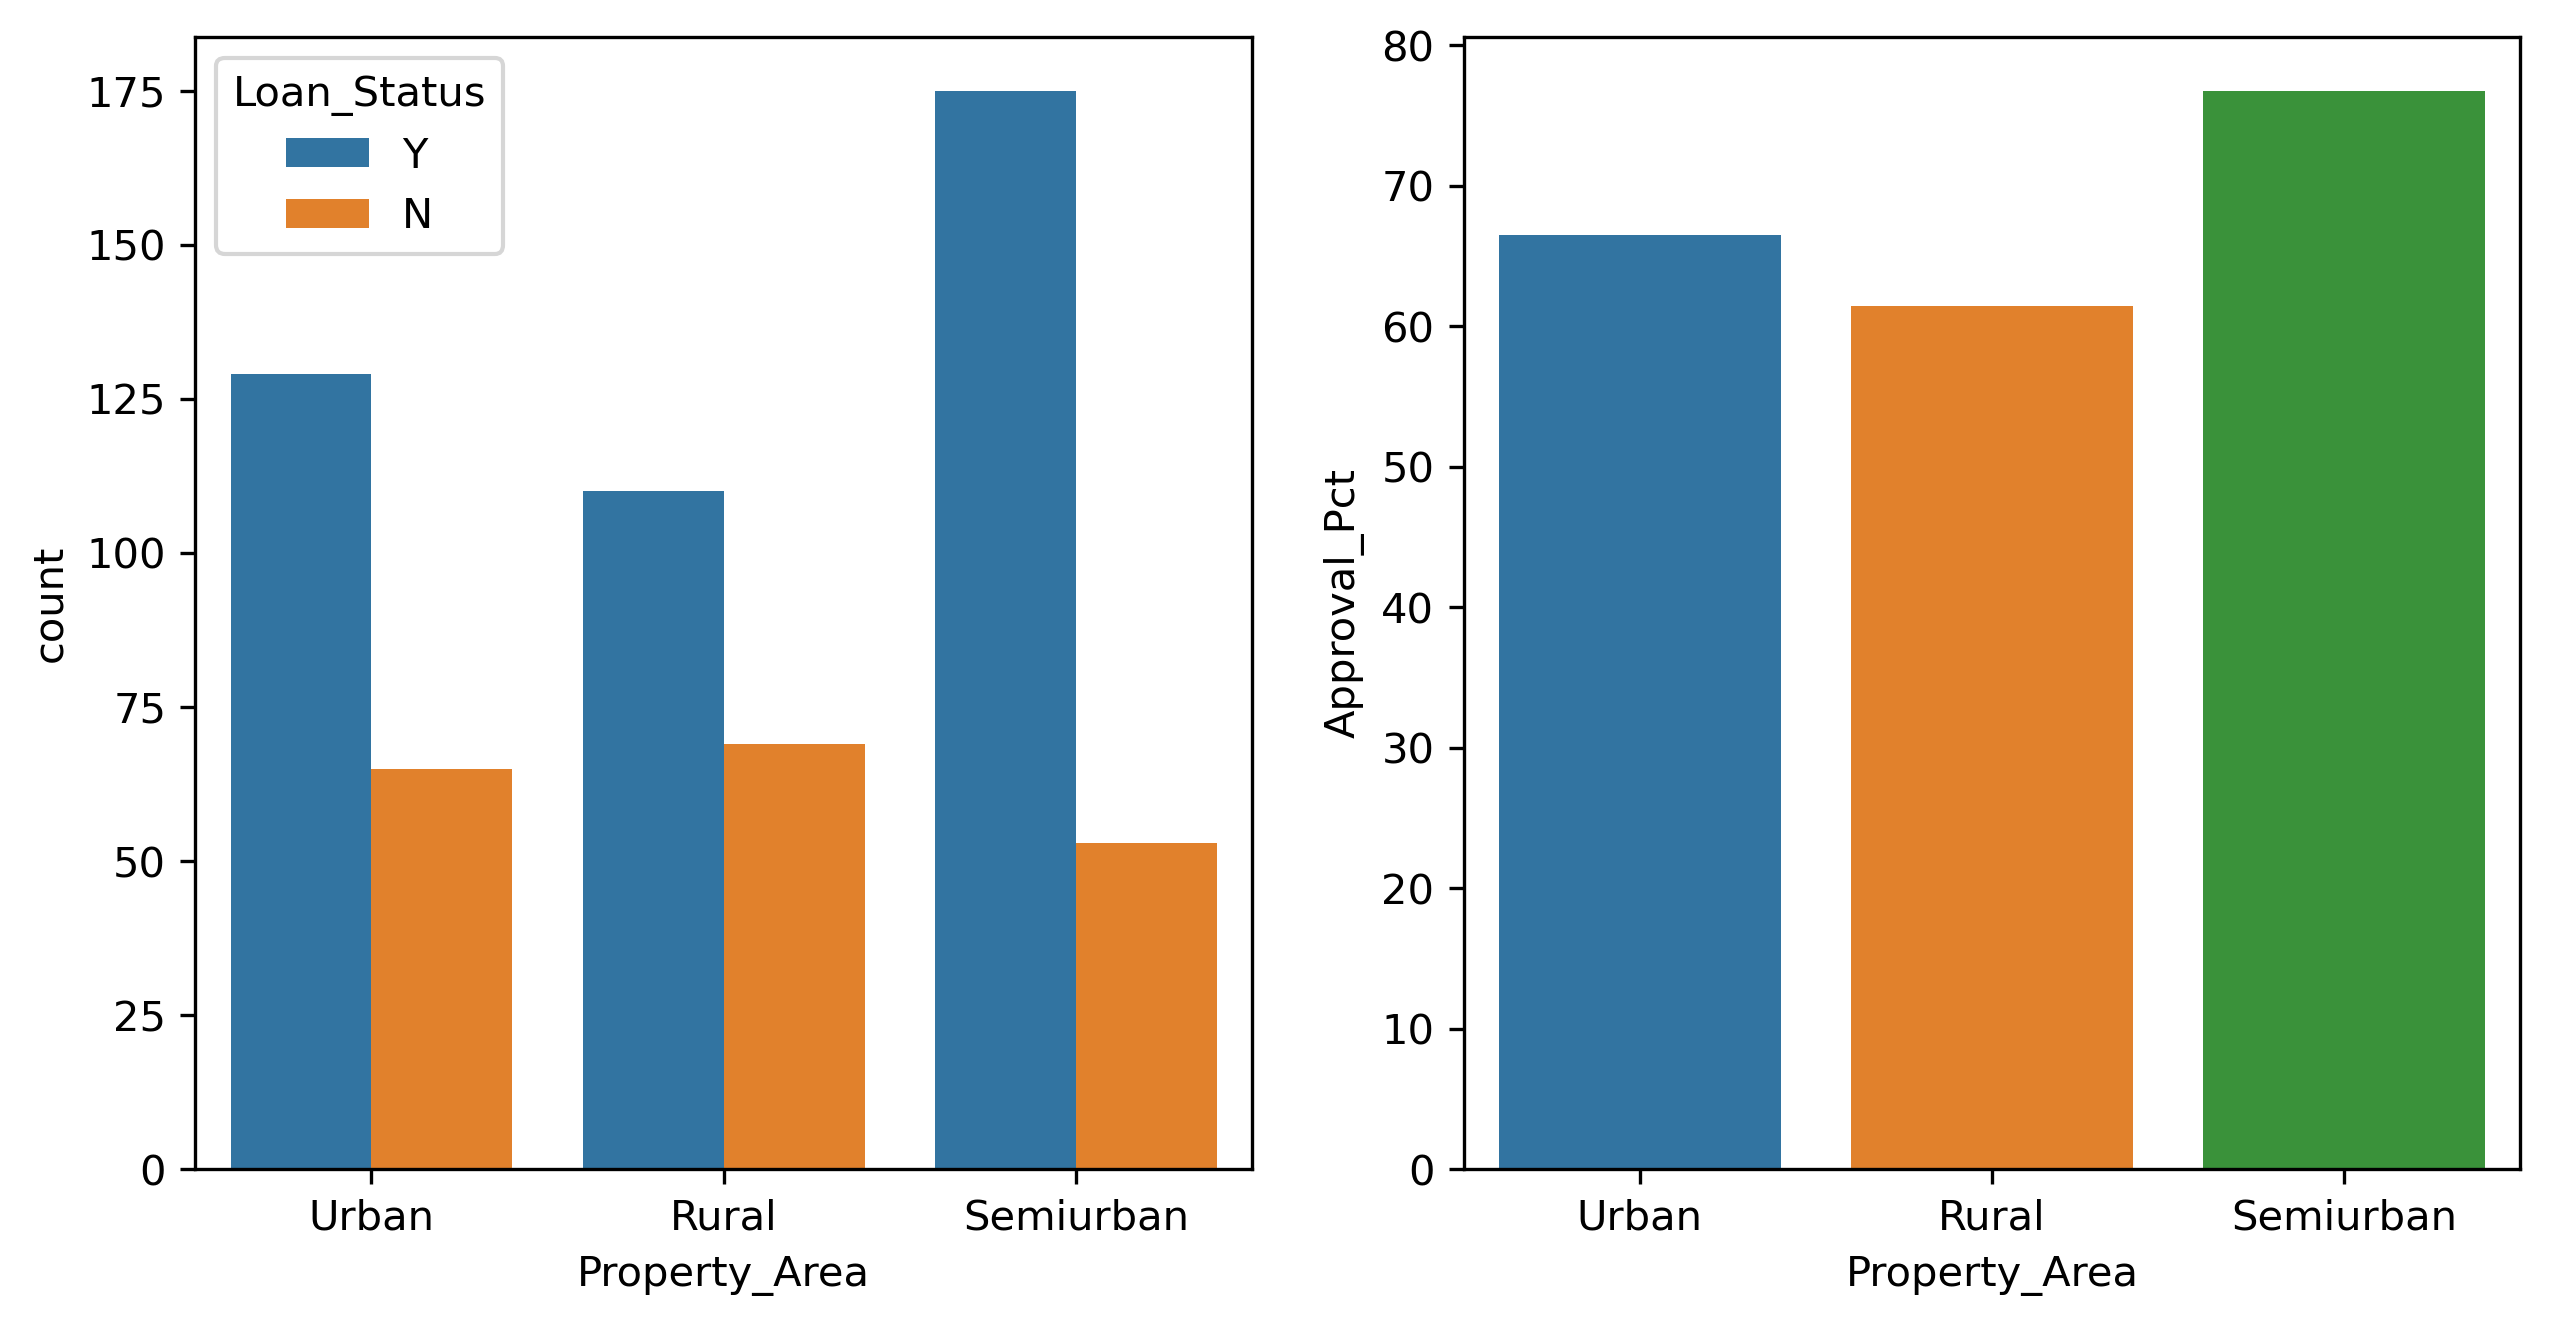

In [22]:
plt.figure(figsize = (10,5),dpi =300)
plt.subplot(1,2,1)
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

plt.subplot(1,2,2)
Property_Area = []
Approval_Pct = []

for i in df['Property_Area'].unique():
    Property_Area.append(i)
    Approved = len(df[(df['Property_Area'] == i) & (df['Loan_Status'] == "Y")])/len(df[(df['Property_Area'] == i)])*100
    Approval_Pct.append(Approved)

Pct = pd.DataFrame(list(zip(Property_Area, Approval_Pct)), columns = ['Property_Area','Approval_Pct'])
sns.barplot(data = Pct,x = 'Property_Area', y ='Approval_Pct')

> Seemingly a little weird, people with semiurban property have nearly 77% to pass, while people have urban property is 66% and people with rural property is the lowest 61%. Maybe property area can be a good predictor.

<AxesSubplot:xlabel='Credit_History', ylabel='Approval_Pct'>

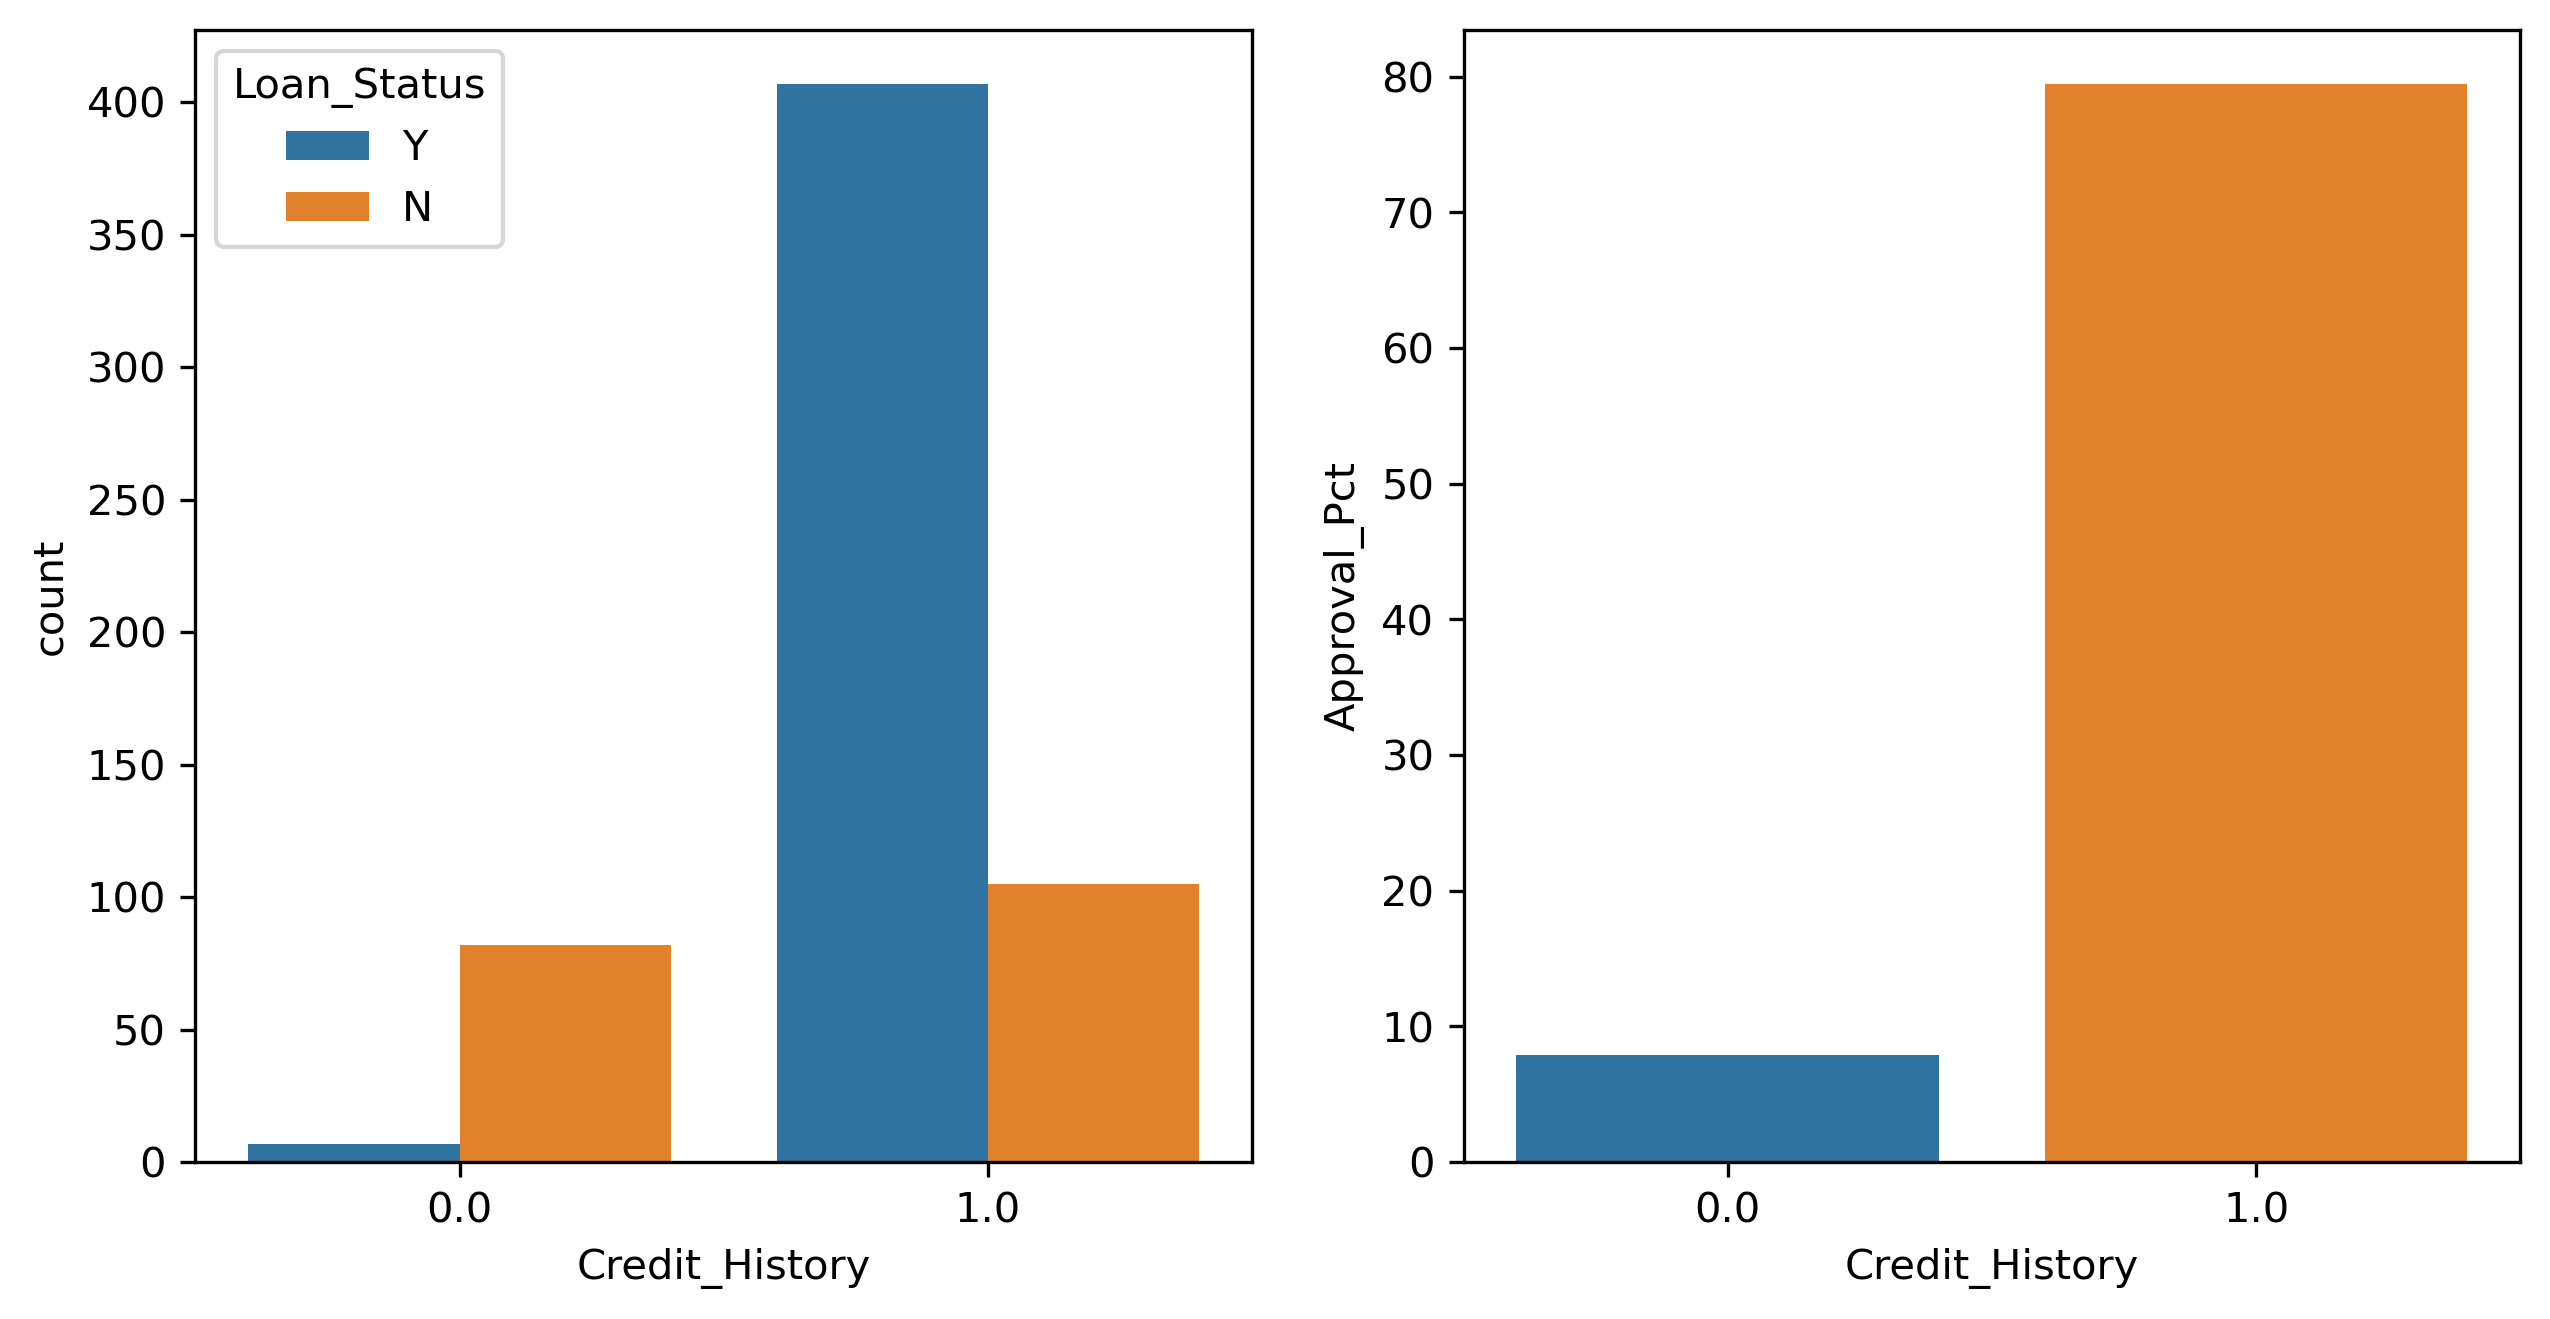

In [23]:
plt.figure(figsize = (10,5),dpi =300)
plt.subplot(1,2,1)
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

plt.subplot(1,2,2)
Credit_History = []
Approval_Pct = []

for i in df['Credit_History'].unique():
    Credit_History.append(i)
    Approved = len(df[(df['Credit_History'] == i) & (df['Loan_Status'] == "Y")])/len(df[(df['Credit_History'] == i)])*100
    Approval_Pct.append(Approved)

Pct = pd.DataFrame(list(zip(Credit_History, Approval_Pct)), columns = ['Credit_History','Approval_Pct'])
sns.barplot(data = Pct,x = 'Credit_History', y ='Approval_Pct')

> Amazingly, people with credit history are far more likely to get the approval. Maybe the fact that they have passed the last loan assessment process implies that they are safer to some degrees. Therefore, credit history is very likely to be a good predictor.

By now ,we can conclude that in terms of catagorial variable,<list><li>Marrial stage<li>Education<li>Property area<li>Credit History<br>might be good predictors.

<a id="2.5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.5. Explore Numerical Data
</p>
</div>

As we can see from our dataset, we have four numerical variables:<list><li>ApplicantIncome<li> CoapplicantIncome<li> LoanAmount<li> Loan_Amount_Term

In [24]:
num_data = df.select_dtypes(include =['int64','float64'])
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,145.869416,360
1,4583.0,1508.0,128.000000,360
2,3000.0,0.0,66.000000,360
3,2583.0,2358.0,120.000000,360
4,6000.0,0.0,141.000000,360


### Univariate analysis

First, we'll try to have a look at these numerical variables through KDE plot.

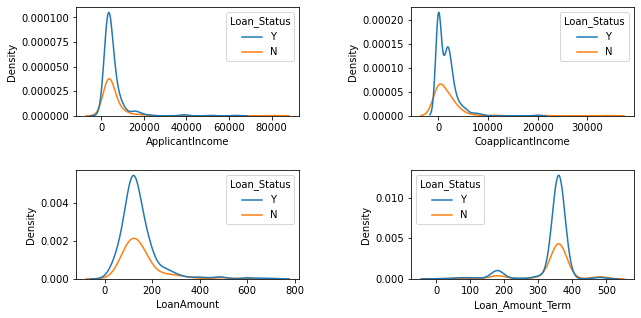

In [25]:

plt.figure(figsize = (10,5))
for i,col in enumerate(num_data.columns):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x = col,hue='Loan_Status',data = df)
    plt.subplots_adjust(wspace = 0.5,hspace = 0.5)

<li>We can see that most of the applicants' income ranges from 0 to 20k. <br>
<li>In terms of Coapplicant Income ,most of it range from 0 to 10k.<br>
<li>For Loan amount, most of applicants' loan amount range from 0 to 400.<br>
<li>And the loan term is mostly half year or one year.<br>

### Continuous numerical data distribution

Text(0.5, 0.98, 'Visualizing continuous numerical columns')

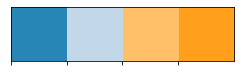

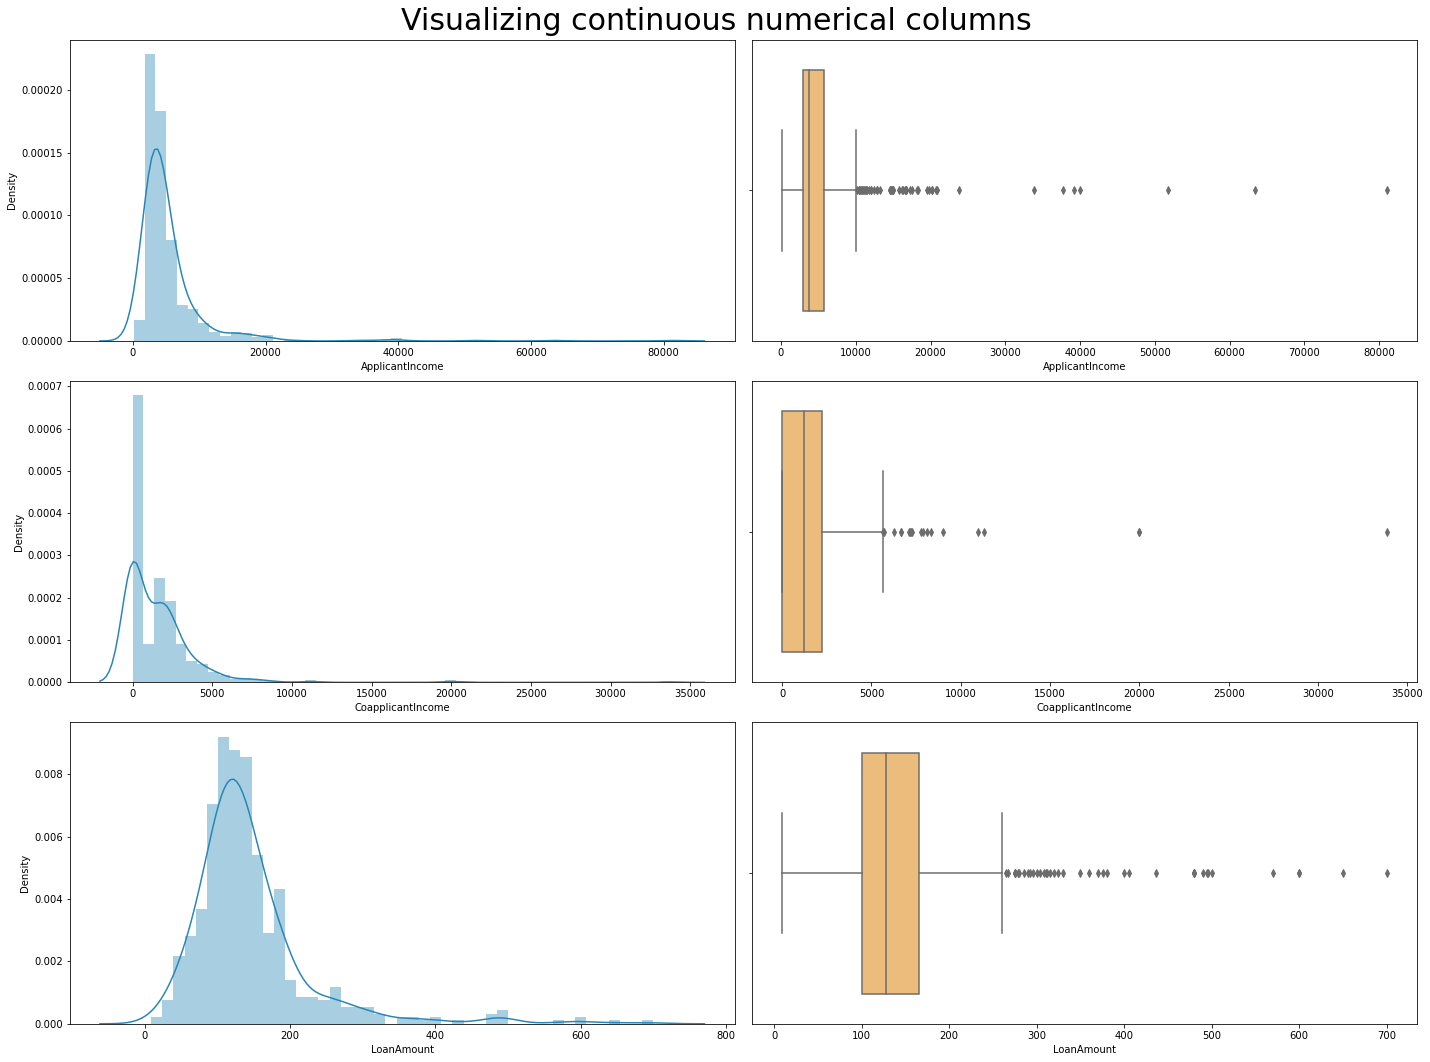

In [26]:
theme = ['#2786b5', '#C2D7E8', '#FFBF69', '#FF9F1C']
sns.palplot(sns.color_palette(theme))

import warnings
warnings.filterwarnings('ignore')

num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

fig,ax = plt.subplots(len(num_cols), 2, figsize=(20,15))
for index,i in enumerate(num_cols ):
    sns.distplot(df[i], ax = ax[index,0], color = theme[0])
    sns.boxplot(df[i], ax = ax[index,1], color = theme[2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous numerical columns",fontsize=30)

> <p> These 3 variables are clearly right skewed <br>
> There are a lot of outliers for these 3 variables </p>
> <p> => It's necessary to normalize the data and deal with the outliers </p>

### Bivariate Analysis

Text(0.5, 1.08, 'Loan Status')

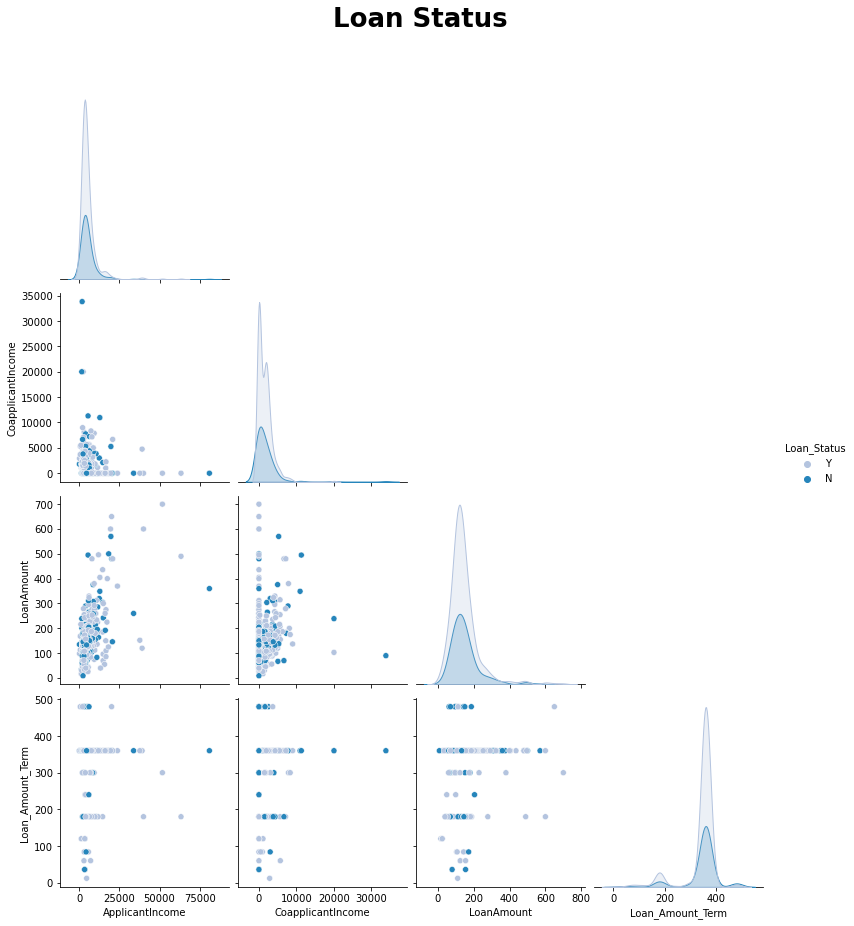

In [27]:
ax = sns.pairplot(df.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']], hue = 'Loan_Status', diag_kind = 'kde', kind = 'scatter', palette = 'PuBu', corner = True)
ax.fig.set_size_inches(12,12)
ax.fig.suptitle('Loan Status', y=1.08, size = 26, weight='bold')

### Correlation Heatmap

Text(0.5, 1.0, 'Correlation of Features')

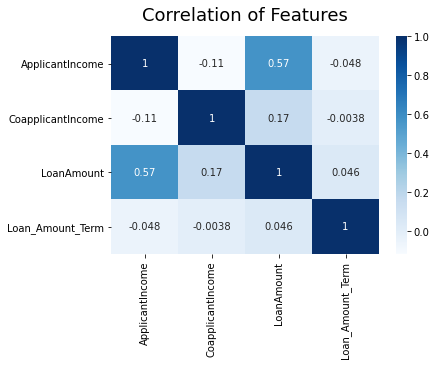

In [28]:
corr = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].corr()
heatmap = sns.heatmap(corr, annot = True, cmap = 'Blues')

heatmap.set_title('Correlation of Features', fontdict= {'fontsize': 18}, pad = 16)

<a id="2.6"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.6. Normalize Data
</p>
</div>

<AxesSubplot:xlabel='Loan_Amount_Log'>

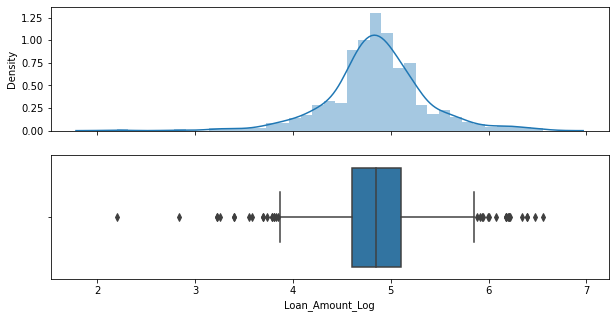

In [29]:
df['Loan_Amount_Log'] = np.log(df['LoanAmount'])

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,5))
sns.distplot(x = df['Loan_Amount_Log'], ax = axes[0])
sns.boxplot(x = df['Loan_Amount_Log'], ax = axes[1])

<AxesSubplot:xlabel='Applicant_Income_Log'>

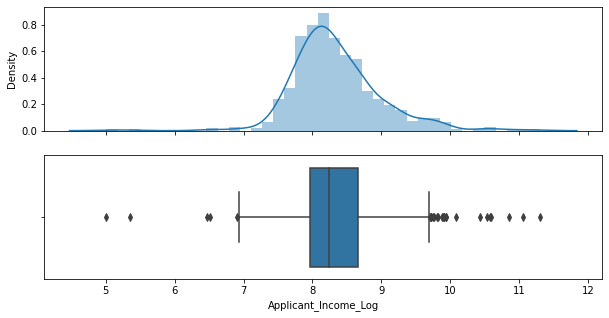

In [30]:
df['Applicant_Income_Log'] = np.log(df['ApplicantIncome'])

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,5))
sns.distplot(x = df['Applicant_Income_Log'], ax = axes[0])
sns.boxplot(x = df['Applicant_Income_Log'], ax = axes[1])

<AxesSubplot:xlabel='Coapplicant_Income_Log'>

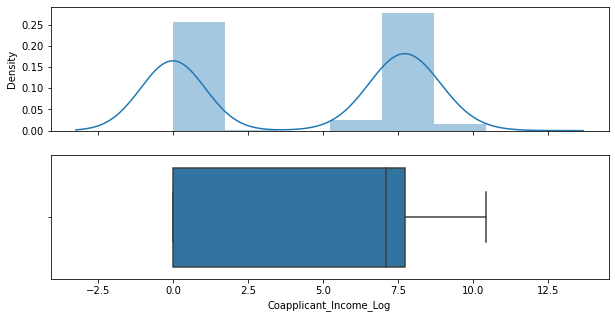

In [31]:
df['Coapplicant_Income_Log'] = np.log(df['CoapplicantIncome'])
df['Coapplicant_Income_Log'] = df['Coapplicant_Income_Log'].replace(-np.inf, 0)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,5))
sns.distplot(x = df['Coapplicant_Income_Log'], ax = axes[0])
sns.boxplot(x = df['Coapplicant_Income_Log'], ax = axes[1])

> The Coapplicant Income column contains "0" values. When we normalize it using np.log the "0" are tranformed into -infinitive. Therefore, after normalizing Coapplicant_Income, we replaced the -inf values with "0" for later analysis.

<a id="2.7"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.7. Handle Outliers
</p>
</div>

In [32]:
OldShape = df.shape

In [33]:
#df = df[df.loc[:,'Total_Income_Log']<9.6]
normalized_num_cols = ['Applicant_Income_Log','Coapplicant_Income_Log','Loan_Amount_Log']
for i in normalized_num_cols:
    Q3,Q1 = np.percentile(df.loc[:,i],[75,25])
    IQR = Q3-Q1
 
    upper_bound = Q3+(1.5*IQR)
    lower_bound = Q1-(1.5*IQR)
    
    df = df[(df[i]>lower_bound) & (df[i]<upper_bound)]

Text(0.5, 0.98, 'Visualizing continuous numerical columns')

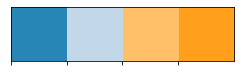

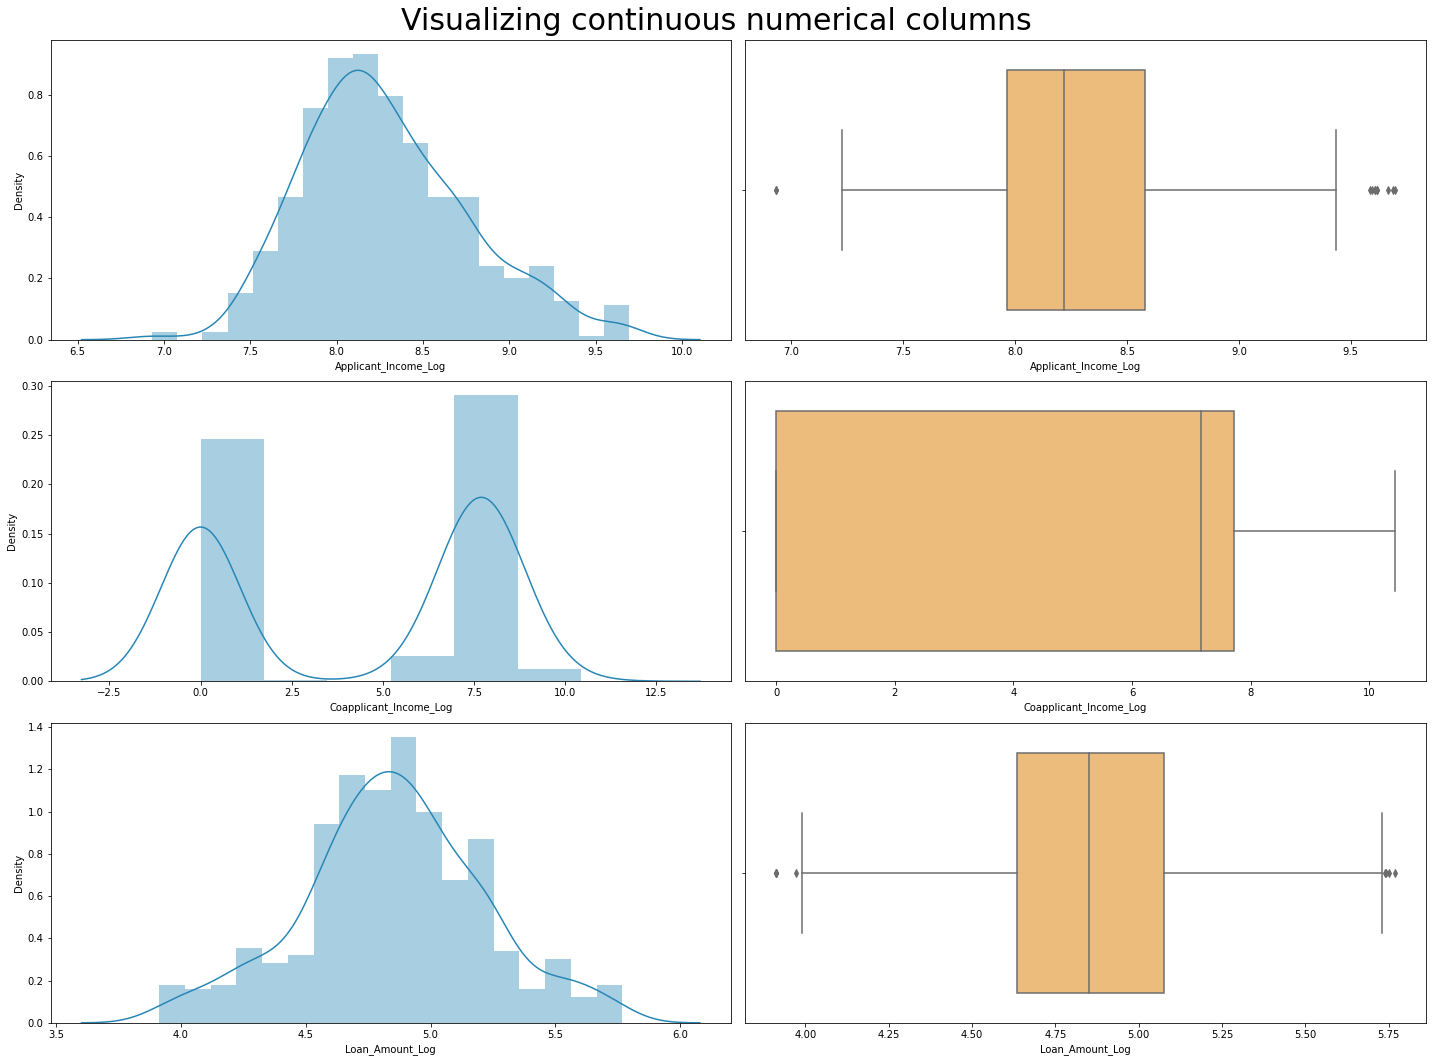

In [34]:
theme = ['#2786b5', '#C2D7E8', '#FFBF69', '#FF9F1C']
sns.palplot(sns.color_palette(theme))

import warnings
warnings.filterwarnings('ignore')

normalized_num_cols = ['Applicant_Income_Log','Coapplicant_Income_Log','Loan_Amount_Log']

fig,ax = plt.subplots(len(normalized_num_cols), 2, figsize=(20,15))
for index,i in enumerate(normalized_num_cols):
    sns.distplot(df[i], ax = ax[index,0], color = theme[0])
    sns.boxplot(df[i], ax = ax[index,1], color = theme[2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous numerical columns",fontsize=30)

In [35]:
NewShape = df.shape

print("Dataframe's shape before removing outliers :", OldShape)
print("Dataframe's shape after removing outliers :", NewShape)

Dataframe's shape before removing outliers : (601, 16)
Dataframe's shape after removing outliers : (545, 16)


> Now that we have removed most of the outliers in numerical columns, let's move on to the next step

<a id="2.8"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          2.8. Cluster Analysis
</p>
</div>

#### We use K-means Clustering Method to identify potential clusters

#### Applicant Income vs Loan status

In [36]:
# Select the variables
x=df[["ApplicantIncome","Loan_Status"]]

# Change into the dummy data
from sklearn.preprocessing import LabelEncoder
x["Loan_Status"] = LabelEncoder().fit_transform(x["Loan_Status"])

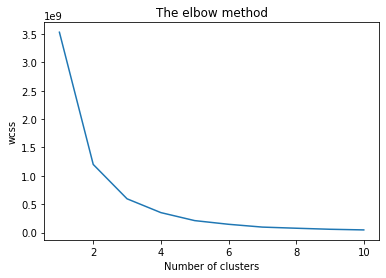

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

> Using elbow method, we find optimal number of cluster is 3

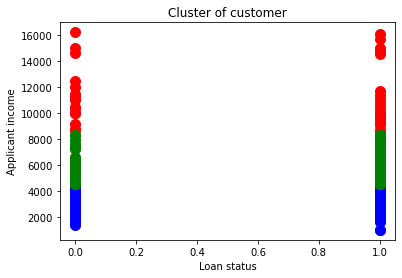

In [38]:
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

x = np.array(x)
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Cluster of customer')
plt.ylabel('Applicant income')
plt.xlabel('Loan status')
plt.legend
plt.show()

#### Applicant income vs Loan amount

In [39]:
# Select the variables
a = df[["ApplicantIncome","LoanAmount"]]

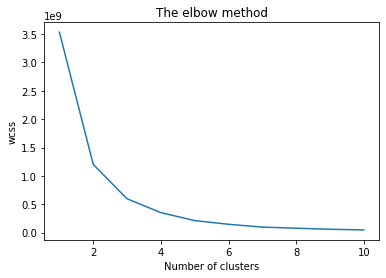

In [40]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
  kmeans.fit(a)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

> Using elbow method, we find optimal number of cluster is 3

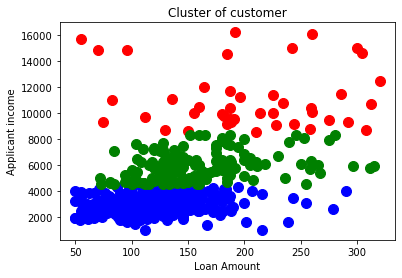

In [41]:
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=42)
b_kmeans = kmeans.fit_predict(a)

a = np.array(a)
plt.scatter(a[b_kmeans == 0, 1], a[b_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(a[b_kmeans == 1, 1], a[b_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(a[b_kmeans == 2, 1], a[b_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Cluster of customer')
plt.ylabel('Applicant income')
plt.xlabel('Loan Amount')
plt.legend
plt.show()

<a id="3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          3. PREDICTION MODEL
</p>
</div>

[Return Table of Contents](#Table)

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Log,Applicant_Income_Log,Coapplicant_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,145.869416,360,1.0,Urban,Y,4.982712,8.674026,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360,1.0,Rural,N,4.852030,8.430109,7.318540
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360,1.0,Urban,Y,4.189655,8.006368,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360,1.0,Urban,Y,4.787492,7.856707,7.765569
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360,1.0,Urban,Y,4.948760,8.699515,0.000000


<a id="3.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          3.1. Prepare the data for building models
</p>
</div>

In [43]:
X = df.loc[:,['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History',
              'Property_Area','Loan_Amount_Log','Applicant_Income_Log','Coapplicant_Income_Log']]

y = df.loc[:,'Loan_Status']

### Encode the categorical data

In [44]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_X = LabelEncoder()
LabelEncoder_y = LabelEncoder()

In [45]:
y = LabelEncoder_y.fit_transform(y)

In [46]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [47]:
for i in (0,1,2,3,4,6,7):
    X.iloc[:,i] = LabelEncoder_X.fit_transform(X.iloc[:,i])

In [48]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_Log,Applicant_Income_Log,Coapplicant_Income_Log
0,1,0,0,0,0,360,1,2,4.982712,8.674026,0.000000
1,1,1,1,0,0,360,1,0,4.852030,8.430109,7.318540
2,1,1,0,0,1,360,1,2,4.189655,8.006368,0.000000
3,1,1,0,1,0,360,1,2,4.787492,7.856707,7.765569
4,1,0,0,0,0,360,1,2,4.948760,8.699515,0.000000


### Split the dataset into train and test set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<a id="3.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          3.2. Build the models
</p>
</div>

In [50]:
#score
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error

#models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import NearestCentroid,KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [51]:
#finding the best models with base parameters
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Ridge', RidgeClassifier()),
    ('SGD Classifier', SGDClassifier(max_iter=1000, tol=1e-3)),
    ('Support Vector Classifier', SVC()),
    ('NuSVC', NuSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('Bernoulli NB', BernoulliNB()),
    ('Perc', Perceptron()),
    ('Nearest Centroid', NearestCentroid()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Ada Boost Classifier', AdaBoostClassifier()),
    ('XGB Classifier', XGBClassifier(verbosity = 0)),
    ('Passive Aggressive', PassiveAggressiveClassifier())
]

results = dict()
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    score = accuracy_score(y_test, pred)    
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    precision = precision_score(y_test, pred) 
    results[name] = [score, precision, mae, mse] 

In [52]:
#storing the results into dataframe
df_results = pd.DataFrame(results)
df_results = df_results.transpose()
df_results = df_results.rename(columns = {0:'Score', 1:'Precision', 2: 'MAE', 3: 'MSE'}).sort_values(by='Score',ascending=False)

<a id="3.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          3.3. Evaluate the models
</p>
</div>

#### Our group evaluates the models based on 4 main criteria:
<p>1. The accuracy score<br>
    2. The precision score<br>
    3. The mean absolute error (MAE)<br>
    4. The mean squared error (MSE)</p> 

In [53]:
df_results.reset_index()
df_results

,Score,Precision,MAE,MSE
XGB Classifier,0.825688,0.835443,0.174312,0.174312
Logistic Regression,0.816514,0.788889,0.183486,0.183486
Ridge,0.816514,0.788889,0.183486,0.183486
Gaussian NB,0.816514,0.788889,0.183486,0.183486
Bernoulli NB,0.816514,0.788889,0.183486,0.183486
Random Forest Classifier,0.816514,0.809524,0.183486,0.183486
Ada Boost Classifier,0.788991,0.781609,0.211009,0.211009
Decision Tree,0.779817,0.842857,0.220183,0.220183
NuSVC,0.733945,0.779221,0.266055,0.266055
Support Vector Classifier,0.660550,0.660550,0.339450,0.339450


#### => Based on the evaluation result, XGB Classifier Model has proved to be the most efficient and optimal model

<a id="3.4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          3.4. Model Improvement
</p>
</div>

#### In order to improve the model, we try to run the model again after adjusting some variables according to our finding through Exploratory Data Analysis.

### Tranform Applicant Income, Coapplicant Income and Loan Amount

In [54]:
# Calculate the rate of Income divided by Loan Amount
df['Income/LoanAmt'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])/df['LoanAmount']

# Normalize the column
df['Income/LoanAmt_Log'] = np.log(df['Income/LoanAmt'])

### Remove unimportant categorical data 

In [55]:
X = df.loc[:,['Married','Education','Loan_Amount_Term','Credit_History','Property_Area',
            'Loan_Amount_Log','Income/LoanAmt_Log']]

y = df.loc[:,'Loan_Status']

### Encode the data

In [56]:
y = LabelEncoder_y.fit_transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [57]:
for i in (0,1,3,4):
    X.iloc[:,i] = LabelEncoder_X.fit_transform(X.iloc[:,i])
X.head()

,Married,Education,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_Log,Income/LoanAmt_Log
0,0,0,360,1,2,4.982712,3.691314
1,1,0,360,1,0,4.852030,3.862537
2,1,0,360,1,2,4.189655,3.816713
3,1,1,360,1,2,4.787492,3.717831
4,0,0,360,1,2,4.948760,3.750755


### Split the dataset into train and test set

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Rebuild the models

In [59]:
#finding the best models with base parameters
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Ridge', RidgeClassifier()),
    ('SGD Classifier', SGDClassifier(max_iter=1000, tol=1e-3)),
    ('Support Vector Classifier', SVC()),
    ('NuSVC', NuSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('Bernoulli NB', BernoulliNB()),
    ('Perc', Perceptron()),
    ('Nearest Centroid', NearestCentroid()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Ada Boost Classifier', AdaBoostClassifier()),
    ('XGB Classifier', XGBClassifier(verbosity = 0)),
    ('Passive Aggressive', PassiveAggressiveClassifier())
]

results = dict()
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    score = accuracy_score(y_test, pred)    
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    precision = precision_score(y_test, pred) 
    results[name] = [score, precision, mae, mse] 

In [60]:
#storing the results into dataframe
df_results = pd.DataFrame(results)
df_results = df_results.transpose()
df_results = df_results.rename(columns = {0:'Score', 1:'Precision', 2: 'MAE', 3: 'MSE'}).sort_values(by='Score',ascending=False)

### Re-evaluate the models

In [61]:
df_results.reset_index()
df_results

,Score,Precision,MAE,MSE
Ada Boost Classifier,0.825688,0.827160,0.174312,0.174312
Logistic Regression,0.816514,0.788889,0.183486,0.183486
Ridge,0.816514,0.788889,0.183486,0.183486
Bernoulli NB,0.816514,0.788889,0.183486,0.183486
Random Forest Classifier,0.816514,0.817073,0.183486,0.183486
Gaussian NB,0.807339,0.793103,0.192661,0.192661
XGB Classifier,0.779817,0.807692,0.220183,0.220183
NuSVC,0.752294,0.784810,0.247706,0.247706
Decision Tree,0.724771,0.800000,0.275229,0.275229
SGD Classifier,0.660550,0.660550,0.339450,0.339450


> According to the evaluation, Ada Boost Classifier is the most optimal model with the same accuracy score, MAE and MSE but a lower precision score. 

#### => By running the models twice, we can conclude that some seemingly unimportant categorical variables such as gender, dependents, self employment also have impacts on the loan status and should not be removed. In conclusion, we keep all the variables and choose XGB Classifier as the most optimal model

<a id="3.5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          3.5. Confusion Matrix
</p>
</div>

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [62]:
X = df.loc[:,['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History',
              'Property_Area','Loan_Amount_Log','Applicant_Income_Log','Coapplicant_Income_Log']]

y = df.loc[:,'Loan_Status']

In [63]:
y = LabelEncoder_y.fit_transform(y)

In [64]:
for i in (0,1,2,3,4,6,7):
    X.iloc[:,i] = LabelEncoder_X.fit_transform(X.iloc[:,i])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
model = XGBClassifier(verbosity = 0)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [67]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 13],
       [ 6, 66]], dtype=int64)

Text(33.0, 0.5, 'Predicted Results')

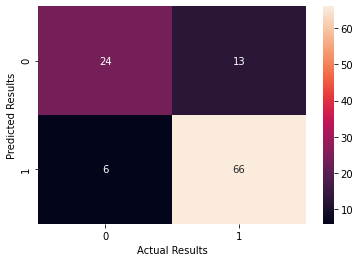

In [68]:
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Results')
plt.ylabel('Predicted Results')

> <b>From the confusion matrix, we can see that there are 17,43% that our model will give the wrong predictions:</b><list><li>
    Type I Error = 6/109 = 5,5% (False Positive - where the model incorrectly predicts the loan is approved when it is actually disapproved)<li>
    Type II Error = 13/109 = 11,93% (False Negative - where the model incorrectly predicts the loan is disapproved when it is actually approved)

<a id="4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          4. CONCLUSION & RECOMMENDATIONS
</p>
</div>

[Return Table of Contents](#Table)

<a id="4.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          4.1. Model selection & Conclusion
</p>
</div>

#### From the model evaluation above, our group has concluded that XGB Classifier Model is the optimal prediction model with the highest accuracy score, high precision score, small mean squared error and mean absolute error value.

<a id="4.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#A0E4CB;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
          text-align:center;
          color:Black;">
          4.2. Loan Prediction Model Deployment
</p>
</div>

In [69]:
import pickle

In [70]:
filename = 'Loan_prediction.pkl'
pickle.dump(model, open(filename, 'wb'))

In [71]:
loaded_model = pickle.load(open('Loan_prediction.pkl', 'rb'))

### Test model deployment with the X_test dataset

In [72]:
X_test.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_Log,Applicant_Income_Log,Coapplicant_Income_Log
269,0,0,1,0,0,360,1,2,4.49981,7.964156,7.352441


In [73]:
input_data = (0,0,1,0,0,360,1.0,2,4.49981,7.964156,7.352441)

input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Loan disapproved!')
else:
  print('Loan approved!')

[1]
Loan approved!


### Model Deployment 1

In [74]:
df.iloc[200,:]

Loan_ID                       LP001754
Gender                            Male
Married                            Yes
Dependents                           0
Education                 Not Graduate
Self_Employed                      Yes
ApplicantIncome                 4735.0
CoapplicantIncome                  0.0
LoanAmount                       138.0
Loan_Amount_Term                   360
Credit_History                     1.0
Property_Area                    Urban
Loan_Status                          N
Loan_Amount_Log               4.927254
Applicant_Income_Log          8.462737
Coapplicant_Income_Log             0.0
Income/LoanAmt               34.311594
Income/LoanAmt_Log            3.535483
Name: 226, dtype: object

In [75]:
Gender = input('Gender (Female=0, Male=1): ')
Married = input('Maritual Status (Not Married=0, Married=1): ')
Dependents = input('Number of dependents: ')
Education = input('Education (Graduate=0, Not graduate=1): ')
Self_Employed = input('Self Employment (No=0, Yes=1): ')
ApplicantIncome = input('Applicant income: ')
CoapplicantIncome = input('Coapplicant income: ')
LoanAmount = input('Loan amount in thousands: ')
Loan_Amount_Term = input('Term of a loan in months: ')
Credit_History = input('Credit history meets guidelines: ')
Property_Area = input('Property Area (Rural=0, Semi-Urban=1, Urban=2): ')

input_data = (Gender, Married, Dependents, Education, Self_Employed, Loan_Amount_Term, Credit_History, Property_Area, LoanAmount, ApplicantIncome, CoapplicantIncome)

# changing the input_data to numpy array
input_data_array = np.asarray(input_data, dtype=np.float64)
    
    # normalize data
input_data_array[8] = np.log(input_data_array[8])
input_data_array[9] = np.log(input_data_array[9])
input_data_array[10] = np.log(input_data_array[10]+1)
input_data_array[10] = str(input_data_array[10]).replace('-inf', '0')
    
    # change dtype to object
input_data_array = input_data_array.astype('object')

    # reshape the array as we are predicting for one instance
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
    

if (prediction[0] == 0):
    print('Loan disapproved!')
else:
    print('Loan approved!')

Gender (Female=0, Male=1): 1
Maritual Status (Not Married=0, Married=1): 1
Number of dependents: 0
Education (Graduate=0, Not graduate=1): 1
Self Employment (No=0, Yes=1): 1
Applicant income: 4735
Coapplicant income: 0
Loan amount in thousands: 138
Term of a loan in months: 360
Credit history meets guidelines: 1
Property Area (Rural=0, Semi-Urban=1, Urban=2): 2
[0]
Loan disapproved!


### Model Deployment 2

Our group's second idea is to deploy the model using Spyder app in Anaconda and create a form for users to fill in. We use streamlit to run the file from the command prompt, then fill in the form opened. A loan prediction result will be generated automatically <br>
* [Loan Approval - Automatic Prediction Form](https://vomaianh-loan-prediction-loan-prediction-web-app-kwn2h1.streamlit.app/)

<a id="5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          5. REFERENCE
</p>
</div>

[Return Table of Contents](#Table)

* [Loan Status Prediction using Machine Learning with Python - 
Siddhardhan](https://www.youtube.com/watch?v=XckM1pFgZmg)
* [Loan Eligibility Prediction Tutorial - Edureka](https://www.youtube.com/watch?v=T9kgWBmUIRk)
* [Loan Prediction Project using Machine Learning in Python - CodeSpeedy](https://www.codespeedy.com/loan-prediction-project-using-machine-learning-in-python/)
* [Loan Approval Prediction using Machine Learning - Simplilearn](https://www.youtube.com/watch?v=x2NrPeHSPU0)
* [Deploy Machine Learning Model using Streamlit in Python - Siddhardhan](https://www.youtube.com/watch?v=WLwjvWq0GWA)
* [Bank Loan Prediction using Machine Learning || Streamlit App - Machine Learning Hub](https://www.youtube.com/watch?v=j54AZjqmCjI)